<a href="https://colab.research.google.com/github/MateusSampaio1/Alura-Voz/blob/main/Notebooks/Desafio_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e carregando os dados


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [ ]:
#Instalando o dython para fazer as correlações
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.set_option('display.max_columns', 50) #Configuando para mostrar todas as colunas

In [ ]:
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
df = pd.read_json(uri) #Lendo os dados e mostrando apenas os 5 primeiros registros.
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.shape #Verificando tamanho do DataFrame

(7267, 6)

In [ ]:
df['customer'][0] #Verificando as informações contidas 

{'Dependents': 'Yes',
 'Partner': 'Yes',
 'SeniorCitizen': 0,
 'gender': 'Female',
 'tenure': 9}

In [ ]:
df['phone'][0] #Verificando as informações contidas

{'MultipleLines': 'No', 'PhoneService': 'Yes'}

In [ ]:
df['internet'][0] #Verificando as informações contidas

{'DeviceProtection': 'No',
 'InternetService': 'DSL',
 'OnlineBackup': 'Yes',
 'OnlineSecurity': 'No',
 'StreamingMovies': 'No',
 'StreamingTV': 'Yes',
 'TechSupport': 'Yes'}

In [ ]:
df['account'][0] #Verificando as informações contidas

{'Charges': {'Monthly': 65.6, 'Total': '593.3'},
 'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check'}

# Normalizando os dados

Será necessário utilizar o json_normalize para obter as informações agrupadas nas variáveis customer, phone, internet e account.

In [ ]:
df_customer = pd.json_normalize(data = df['customer']) #Extraindo as informações contidas na coluna Customer
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [ ]:
df_phone = pd.json_normalize(data = df['phone']) #Extraindo as informações contidas na coluna Phone
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [ ]:
df_internet = pd.json_normalize(data = df['internet']) #Extraindo as informações contidas na coluna Internet
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [ ]:
df_account = pd.json_normalize(data=df['account']) #Extraindo as informações contidas na coluna Account
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


##Incluindo as novas colunas obtidas com o normalize

In [ ]:
df = pd.merge(left = df, right = df_customer, left_index = True, right_index = True) #Juntando o df_customer ao conjunto de dados original (df)
df = pd.merge(left = df, right = df_phone, left_index = True, right_index = True) #Juntando o df_phone ao conjunto de dados  original (df)
df = pd.merge(left= df, right = df_internet, left_index = True, right_index = True) #Juntando o df_internet ao conjunto de dados  original (df)
df = pd.merge(left = df, right = df_account, left_index = True, right_index = True) #Juntando o df_account ao conjunto de dados  original (df)

df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Com a junção destas novas colunas ao df, as colunas customer, phone, internet e account podem ser removidas do Dataframe sem maiores problemas.


In [ ]:
df.drop(['customer', 'phone','internet', 'account'], axis = 1, inplace = True) #Remonendo as colunas desnecessárias
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Tratamento inicial dos dados.

## Traduzindo o nome das colunas

In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
df.rename(columns = {'customerID': 'ID_cliente', 'Churn':'Evasao', 'gender':'Genero', 'SeniorCitizen':'Idoso', 'Partner':'Parceiro', 'Dependents':'Dependentes', 'tenure':'Contratacao_meses',
       'Contract':'Contrato', 'PaperlessBilling':'Conta_digital', 'PaymentMethod':'Metodo_pagamento', 'Charges.Monthly': 'Cobranca_mensal',
       'Charges.Total':'Cobranca_total', 'InternetService':'Servico_internet', 'OnlineSecurity':'Seguranca_online', 'OnlineBackup':'Backup_online',
       'DeviceProtection':'Protecao_dispositivos', 'TechSupport':'Suporte_tecnico', 'StreamingTV':'Tv_a_cabo', 'StreamingMovies':'Streaming_filmes',
       'PhoneService':'Servico_telefonia', 'MultipleLines':'Linhas_multiplas'}, inplace = True)

In [ ]:
df.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Verificação dos tipos de dados e possíveis inconsistências

In [ ]:
df.info() #Verificando se existem dados nulos e quais são os tipos dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_cliente             7267 non-null   object 
 1   Evasao                 7267 non-null   object 
 2   Genero                 7267 non-null   object 
 3   Idoso                  7267 non-null   int64  
 4   Parceiro               7267 non-null   object 
 5   Dependentes            7267 non-null   object 
 6   Contratacao_meses      7267 non-null   int64  
 7   Servico_telefonia      7267 non-null   object 
 8   Linhas_multiplas       7267 non-null   object 
 9   Servico_internet       7267 non-null   object 
 10  Seguranca_online       7267 non-null   object 
 11  Backup_online          7267 non-null   object 
 12  Protecao_dispositivos  7267 non-null   object 
 13  Suporte_tecnico        7267 non-null   object 
 14  Tv_a_cabo              7267 non-null   object 
 15  Stre

Inicialmente é possível observar algumas inconsistências relacionadas ao tipo das colunas Cobrança_total e Idoso.



Contudo, existe algum problema com algum dado presente na coluna Cobrança_total, porque não foi possível convertê-lo em float para depois convertê-la em inteiro.


In [ ]:
df.query("Cobranca_total == ' '") #Vericando se existe alguma linha vazia na coluna Cobranca_total

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
df.query("Contratacao_meses == 0")

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
df.query("Contratacao_meses == 0")['ID_cliente'].isin(df.query("Cobranca_total == ' '")['ID_cliente'])
#Verificando se todos os registros com valor da coluna Contratação_Mensal igual a 0 são iguais aos que possuem valores vazios na coluna Cobrança_total

975     True
1775    True
1955    True
2075    True
2232    True
2308    True
2930    True
3134    True
3203    True
4169    True
5599    True
Name: ID_cliente, dtype: bool

Depois de comparar as informações obtidas com o filtro que mostrava as linhas vazias da coluna Cobraca_total com as linhas que continham valores iguais a 0 na coluna Contratacao_meses, é possível observar que todas as 11 observações são as mesmas, possívelmente se tratando de novos contratantes.
Por esse motivo, acredito ser razoável substituir os dados vazios por 0.

In [ ]:
df['Cobranca_total'] = df['Cobranca_total'].replace(' ', 0) #Substituindo os valores vazios por 0

In [ ]:
df = df.astype({"Cobranca_total": float}) #Modificando o tipo de object para float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_cliente             7267 non-null   object 
 1   Evasao                 7267 non-null   object 
 2   Genero                 7267 non-null   object 
 3   Idoso                  7267 non-null   int64  
 4   Parceiro               7267 non-null   object 
 5   Dependentes            7267 non-null   object 
 6   Contratacao_meses      7267 non-null   int64  
 7   Servico_telefonia      7267 non-null   object 
 8   Linhas_multiplas       7267 non-null   object 
 9   Servico_internet       7267 non-null   object 
 10  Seguranca_online       7267 non-null   object 
 11  Backup_online          7267 non-null   object 
 12  Protecao_dispositivos  7267 non-null   object 
 13  Suporte_tecnico        7267 non-null   object 
 14  Tv_a_cabo              7267 non-null   object 
 15  Stre

## Verificando se existe mais alguma incosintência além da coluna Idoso

In [ ]:
df['Evasao'].unique() #Verificando os valores unicos presentes nessa coluna **

array(['No', 'Yes', ''], dtype=object)

In [ ]:
df.query("Evasao == ''") #Filtrando os dados com linhas vazias na coluna Evasão 

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Como é possível ver acima, existem dados vazios na coluna Evasao(Churn), para não prejudicar a análise dos dados, essas linhas serão removidas.


In [ ]:
df.drop(df.query("Evasao == ''").index, axis = 0, inplace = True) #Retirando as linhas que faltavam informações da coluna Evasao do DataFrame (df)

In [ ]:
df.reset_index(inplace = True, drop = True) #Resetando o index e salvando a alteração
df

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df['Evasao'].unique() #Verificando se o problema foi resolvido

array(['No', 'Yes'], dtype=object)

Continuando as verificações...

In [ ]:
df['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Idoso'].unique() #Aqui será necessário transformar de 0 ou 1 p/ Sim ou Não

array([0, 1])

In [ ]:
df['Parceiro'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Dependentes'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Contratacao_meses'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [ ]:
df['Servico_telefonia'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Linhas_multiplas'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
df['Servico_internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df['Seguranca_online'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['Backup_online'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['Protecao_dispositivos'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['Suporte_tecnico'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['Tv_a_cabo'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['Streaming_filmes'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['Contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
df['Conta_digital'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Metodo_pagamento'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
df['Cobranca_mensal'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [ ]:
df['Cobranca_total'].unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

## Traduzindo os dados das linhas



In [ ]:
df['Evasao'] = df['Evasao'].replace({'No':'Não','Yes':'Sim'})
df['Dependentes'] = df['Dependentes'].replace({'No':'Não','Yes':'Sim'})
df['Servico_telefonia'] = df['Servico_telefonia'].replace({'No':'Não','Yes':'Sim'})
df['Conta_digital']= df['Conta_digital'].replace({'No':'Não','Yes':'Sim'})
df['Genero'] = df['Genero'].replace({'Female':'Feminino', 'Male':'Masculino'})
df['Servico_internet'] = df['Servico_internet'].replace({'Fiber optic':'Fibra ótica', 'No':'Não'})
df['Linhas_multiplas'] = df['Linhas_multiplas'].replace({'Yes':'Sim','No':'Não','No phone service':'Sem serviço de telefonia'})
df['Streaming_filmes'] = df['Streaming_filmes'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Tv_a_cabo'] = df['Tv_a_cabo'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Protecao_dispositivos'] = df['Protecao_dispositivos'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Parceiro'] = df['Parceiro'].replace({'Yes':'Sim', 'No':'Não'})
df['Seguranca_online']= df['Seguranca_online'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Backup_online'] = df['Backup_online'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Suporte_tecnico'] = df['Suporte_tecnico'].replace({'Yes':'Sim','No':'Não','No internet service':'Sem serviço de internet'})
df['Metodo_pagamento'] = df['Metodo_pagamento'].replace({'Mailed check':'Cheque', 'Electronic check':'Cheque Eletrônico', 'Credit card (automatic)':'Cartão de Credito',
       'Bank transfer (automatic)':'Débito Automático'})
df['Contrato'] = df['Contrato'].replace({'One year':'Anual', 'Month-to-month':'Mês a Mês', 'Two year':'Bianual'})
df['Idoso'] = df['Idoso'].replace({0:'Não',1:'Sim'})

In [ ]:
df.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mês a Mês,Não,Cheque,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mês a Mês,Sim,Cheque Eletrônico,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mês a Mês,Sim,Cheque Eletrônico,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mês a Mês,Sim,Cheque,83.9,267.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_cliente             7043 non-null   object 
 1   Evasao                 7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   Idoso                  7043 non-null   object 
 4   Parceiro               7043 non-null   object 
 5   Dependentes            7043 non-null   object 
 6   Contratacao_meses      7043 non-null   int64  
 7   Servico_telefonia      7043 non-null   object 
 8   Linhas_multiplas       7043 non-null   object 
 9   Servico_internet       7043 non-null   object 
 10  Seguranca_online       7043 non-null   object 
 11  Backup_online          7043 non-null   object 
 12  Protecao_dispositivos  7043 non-null   object 
 13  Suporte_tecnico        7043 non-null   object 
 14  Tv_a_cabo              7043 non-null   object 
 15  Stre

Agora a inconsistência encontrada na coluna Idoso foi resolvida, assim como as outras inconsistências encontradas.


## Adicionando uma nova coluna com o valor referente a uma "Cobrança Diária"

In [ ]:
cobranca_diaria = (df['Cobranca_mensal']/30).round(2)
cobranca_diaria

0       2.19
1       2.00
2       2.46
3       3.27
4       2.80
        ... 
7038    1.84
7039    2.84
7040    1.68
7041    2.26
7042    1.97
Name: Cobranca_mensal, Length: 7043, dtype: float64

In [ ]:
df.insert(loc = 19, value = cobranca_diaria, column = 'Cobranca_diaria')

In [ ]:
df.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_diaria,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mês a Mês,Não,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mês a Mês,Sim,Cheque Eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mês a Mês,Sim,Cheque Eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mês a Mês,Sim,Cheque,2.80,83.9,267.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_cliente             7043 non-null   object 
 1   Evasao                 7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   Idoso                  7043 non-null   object 
 4   Parceiro               7043 non-null   object 
 5   Dependentes            7043 non-null   object 
 6   Contratacao_meses      7043 non-null   int64  
 7   Servico_telefonia      7043 non-null   object 
 8   Linhas_multiplas       7043 non-null   object 
 9   Servico_internet       7043 non-null   object 
 10  Seguranca_online       7043 non-null   object 
 11  Backup_online          7043 non-null   object 
 12  Protecao_dispositivos  7043 non-null   object 
 13  Suporte_tecnico        7043 non-null   object 
 14  Tv_a_cabo              7043 non-null   object 
 15  Stre

In [ ]:
df.to_json('Telco_Customer_Churn_Limpo.json') #Salvando as informações depois da limpeza. 

#Início da análise exploratória dos dados.


Primeiro é preciso destacar as variáveis presentes no DataFrame e como elas se classificam, para só então definir quais serão as técnicas utilizadas para a análise.
No DataFrame utilizado elas se distribuem da seguinte forma:
+ Variáveis Qualitativas / Categóricas.

    - **Genero**: Masculino ou Feminino;
    - **Idoso**: Pessoa com 65 anos ou mais;
    - **Parceiro**: Identifica se o cliente possui um parceiro ou parceira;
    - **Dependentes**: Identifica de o cliente possui ou não dependentes;
    - **Servico_telefonia**: Identifica se o cliente contratou ou não o serviço de telefonia;
    - **Linhas_multiplas**: Identifica se o cliente optou pela assinatura de mais de uma linha;
    - **Servico_internet**: Identifica qual a tecnologia de transmição de dados contratada pelo cliente ou se ele escolheu não contratar esse serviço;
    - **Seguranca_online**: Identifica se o cliente contratou ou não o serviço adicional de segurança online, em caso de contratação do serviço de internet;
    - **Backup_online**: Identifica se o cliente contratou o serviço adicional de backup online, em caso de contratação do serviço de internet;
    - **Protecao_dispositivos**: Identifica se o cliente contratou o serviço adicional de proteção nos dispositivos, em caso de contratação do serviço de internet;
    - **Suporte_tecnico**: Identifica se o cliente contratou o serviço adicional que lhe concede prioridade de atendimento da equipe de suporte técnico, em caso de contratação do serviço de internet;
    - **Tv_a_cabo**: Identifica se cliente contratou o serviço adicional de Tv a cabo, oferecido em caso de contratação do serviço de internet;
    - **Streaming_filmes**: Identifica se o cliente contratou o serviço adcional de streaming de filmes, oferecido em caso de contratação do serviço de internet;
    - **Contrato**: Corresponde a qual o tipo de contrato escolhido pelo cliente, podendo ser mensal, anual ou Bianual;
    - **Conta_digital**: Identifica se o cliente optou por receber a conta online;
    - **Metodo_pagamento**: Identifica qual foi o método de pagamento escolhido pelo cliente.

+ Variável Quantitativas.

    - **Contratacao_meses**: Identifica a quanto tempo o cliente tem de contrato com a Alura Voz;
    - **Cobranca_diaria**: Identifica o valor dos gastos diáros dos clientes;
    - **Cobranca_mensal**: Identifica o valor total de todos os serviços contratados pelo cliente;
    - **Cobranca_total**: Identifica o valor total pago durante todo o periodo de permanencia do cliente na Alura Voz. 

É possível afirmar que este conjunto de dados se divide entre variáveis **qualitativa** e **quantitativas**, sendo as variáveis qualitativas mais presentes.  

In [ ]:
# Visualizando novamente parte do DataFrame
df.head() 

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_diaria,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mês a Mês,Não,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mês a Mês,Sim,Cheque Eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mês a Mês,Sim,Cheque Eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mês a Mês,Sim,Cheque,2.80,83.9,267.40



> A variável **target** desta df é a variável **Evasão(Churn)**, por isso, a ideial inicial é verificar seu **comportamento** e a maneira com que ela se **relaciona** com  as outras variáveis.

## Análise da variável target

In [ ]:
# Calculando a distribuição da variável
dados_evasao = df['Evasao'].value_counts() 
dados_evasao

Não    5174
Sim    1869
Name: Evasao, dtype: int64

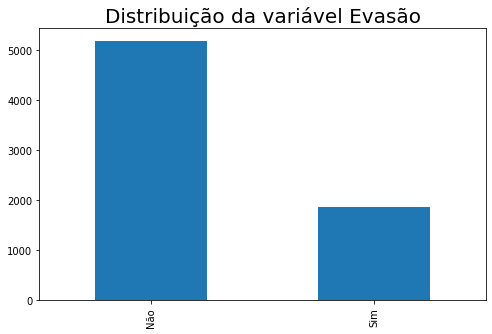

In [ ]:
# Plotando a distribuição
ax_e = dados_evasao.plot.bar()
ax_e.figure.set_size_inches(8,5)
ax_e.set_title('Distribuição da variável Evasão', fontsize = 20)
ax_e = ax_e

  Com base na distribuição encontrada entre os dados, é possivel afirmar que a quantidade de clientes que resolveram deixar de utilizar os serviços da Alura voz é pouco mais de 1/4 do valor total de clientes registrados neste conjunto de dados.

## Buscando possíveis fatores que justifiquem essa distribuição.

### Observação da relação da variável Cobrança_mensal e a variável target.

In [ ]:
#Criando uma tabela de descrição da coluna Cobrança_mensal, agrupada pela variável Evasão.
df.groupby(['Evasao'])['Cobranca_mensal'].describe() 

,count,mean,std,min,25%,50%,75%,max
Evasao,,,,,,,,
Não,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Sim,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


Aparentemente os valores cobrados para aquele que resolveram deixar a empresa são mais altos quando comparados com aquele que ainda tem o plano.

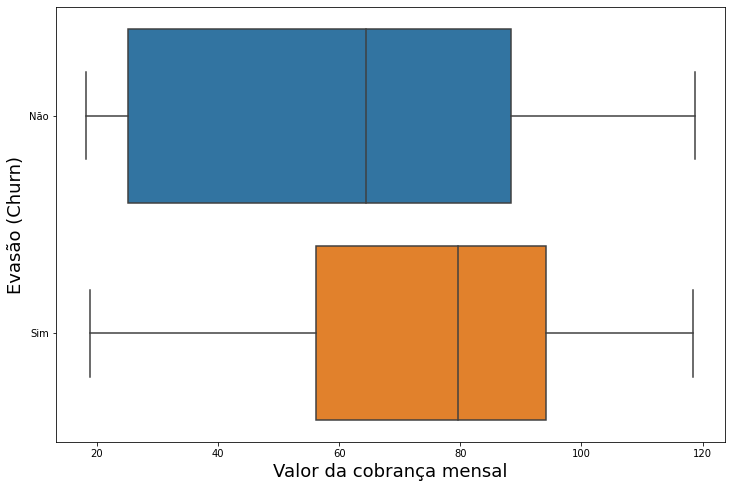

In [ ]:
#Criando um bloxplot para visualizar melhor essa distribuição.
ax =sns.boxplot(y = 'Evasao', x = 'Cobranca_mensal', data = df)
ax.figure.set_size_inches(12,8),
ax.set_xlabel('Valor da cobrança mensal', fontsize= 18)
ax.set_ylabel('Evasão (Churn)',fontsize = 18)
ax = ax


In [ ]:
#Criando duas variáveis que contenham os dados da cobrança mensal agrupadas pelas duas variáveis do target
clientes_que_sairam = df.query("Evasao == 'Sim'")['Cobranca_mensal'] 

clientes_que_continuam = df.query("Evasao=='Não'")['Cobranca_mensal'] 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


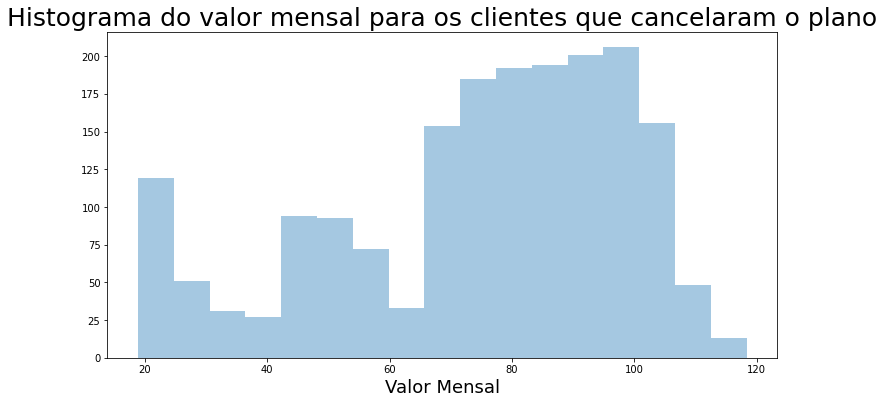

In [ ]:
#Criando um histograma para observar a distribuição dos valores cobrados para aquele que deixaram a empresa.

ax = sns.distplot(clientes_que_sairam, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma do valor mensal para os clientes que cancelaram o plano',fontsize = 25)
ax.set_xlabel('Valor Mensal', fontsize = 18)
ax = ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


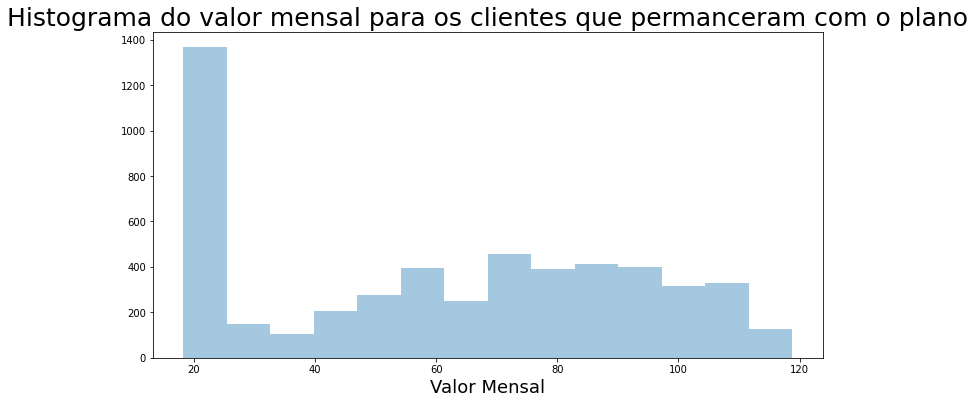

In [ ]:
#Criando um histograma para observar a distribuição dos valores cobrados para aquele que não deixaram a empresa.

ax = sns.distplot(clientes_que_continuam, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma do valor mensal para os clientes que permanceram com o plano',fontsize = 25)
ax.set_xlabel('Valor Mensal', fontsize = 18)
ax = ax

Com base nas observações feitas com o boxplot e com os histogramas, é possível confirmar o pressuposto levantado anteriormente, os valores cobrados para aquele que deixaram o plano são relativamente mais altos do que aqueles que se mantiveram.

### Observação da relação da variável Contratação_meses e a variável target.

In [ ]:
#Criando uma tabela de descrição da coluna Cobrança_mensal, agrupada pela variável Evasão.
df.groupby('Evasao')['Contratacao_meses'].describe() 

,count,mean,std,min,25%,50%,75%,max
Evasao,,,,,,,,
Não,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Sim,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Aparentemente os clientes que resolveram sair são em sua grande maioria os "novos clientes"

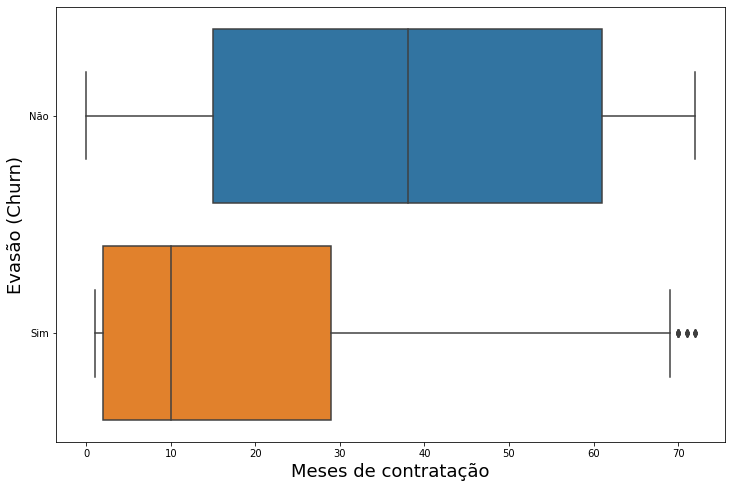

In [ ]:
#Criando um boxplot para demostrar visualmente os valores encontrados acima.
ax = sns.boxplot(y = 'Evasao', x = 'Contratacao_meses', data = df)
ax.figure.set_size_inches(12,8),
ax.set_xlabel('Meses de contratação', fontsize= 18)
ax.set_ylabel('Evasão (Churn)', fontsize = 18)
ax = ax

In [ ]:
# Criando as variáveis para armazenar os dados dos meses de contratação agrupados pela Evasão
cliente_que_saiu_mc = df.query("Evasao =='Sim'")['Contratacao_meses']
cliente_que_n_saiu_mc = df.query("Evasao =='Não'")['Contratacao_meses']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


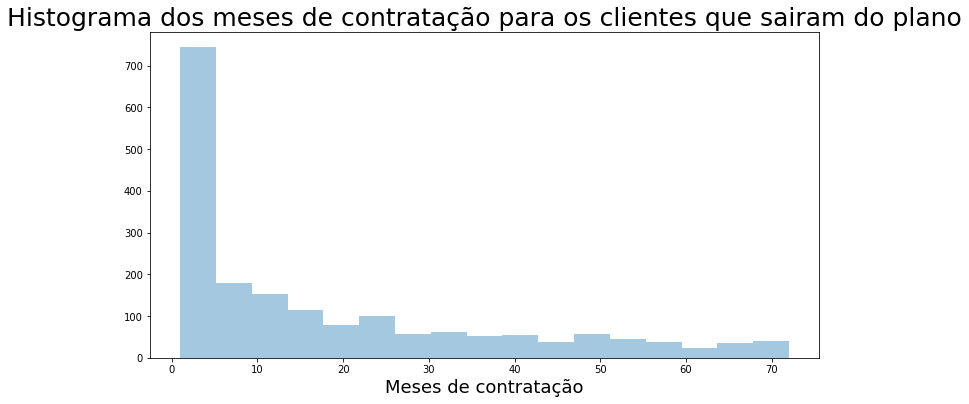

In [ ]:
#Criando um histograma para visualizar a distribuição da variável que contempla aquele que sairam

ax = sns.distplot(cliente_que_saiu_mc, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma dos meses de contratação para os clientes que sairam do plano',fontsize = 25)
ax.set_xlabel('Meses de contratação', fontsize = 18)
ax = ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


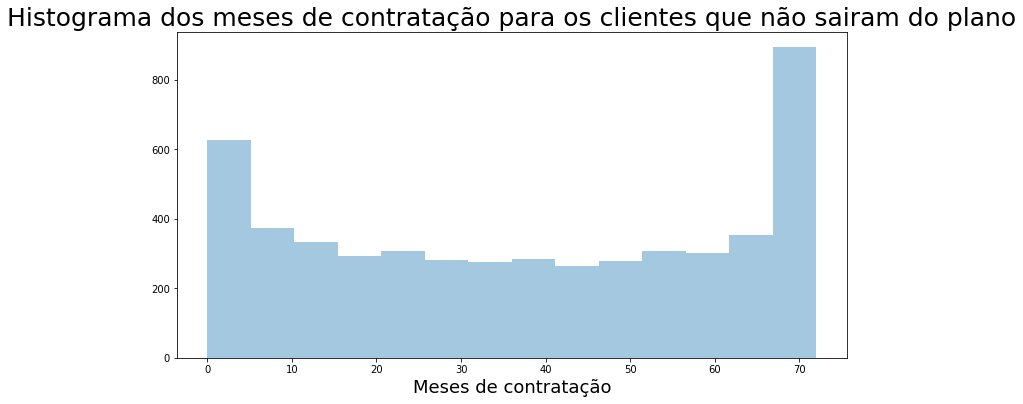

In [ ]:
#Criando um histograma para visualizar a distribuição da variável que contempla aquele que não sairam

ax = sns.distplot(cliente_que_n_saiu_mc, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma dos meses de contratação para os clientes que não sairam do plano',fontsize = 25)
ax.set_xlabel('Meses de contratação', fontsize = 18)
ax = ax

Após observamos o resultado obtido com as visualizações geradas acima, acredito que seja plausível considerar que o pressuposto levantado inicialmente foi confirmado. No boxplot e no histograma isso fica bem evidente, visto que temos uma concentração dos dados mais a esquerda, gerando uma assimetria a direita no gráfico.

### Observação da variável Gênero e a variável target

In [ ]:
# Tabela de entrada dupla para as variáveis Gênero e Evasão
tabela_dupla = pd.crosstab(index = df['Genero'], columns= df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Genero,,
Feminino,2549,939
Masculino,2625,930


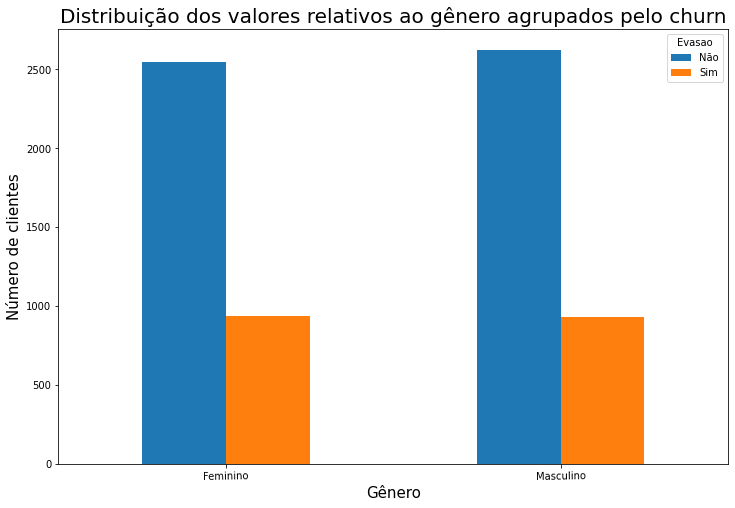

In [ ]:
# Plotando um gráfico de barras para visualizar a distribuição acima
tabela_dupla.plot.bar(rot = 1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição dos valores relativos ao gênero agrupados pelo churn', fontsize = 20)
plt.xlabel('Gênero', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

Os valores encontrados para aquele que decidiram sair são praticamente o mesmo para ambos os sexos e por isso acredito que seja razoável supor que não exista diferenciação entre o gênero.

### Observação da variável Idoso e a variável target

In [ ]:
tabela_dupla = pd.crosstab(index = df['Idoso'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Idoso,,
Não,4508,1393
Sim,666,476


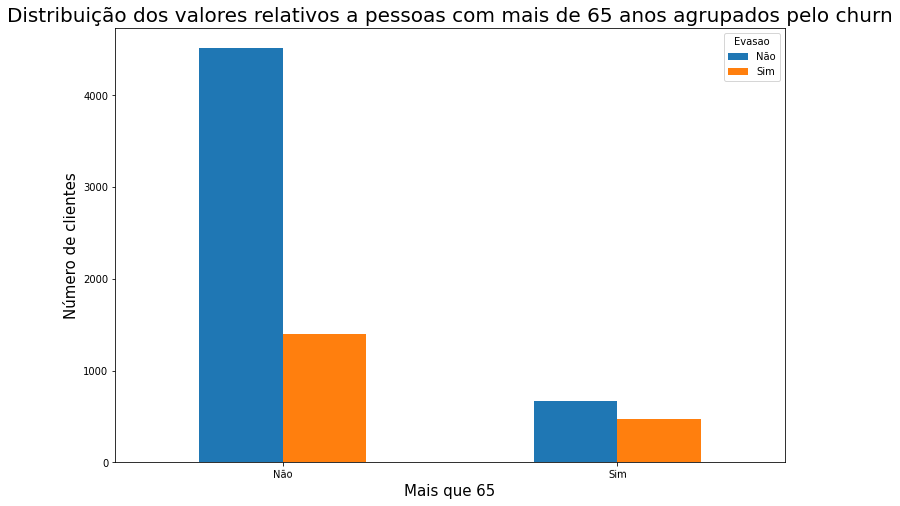

In [ ]:
# Plotando um gráfico de barras para visualizar a distribuição acima
tabela_dupla.plot.bar(rot = 1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição dos valores relativos a pessoas com mais de 65 anos agrupados pelo churn', fontsize = 20)
plt.xlabel('Mais que 65', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()


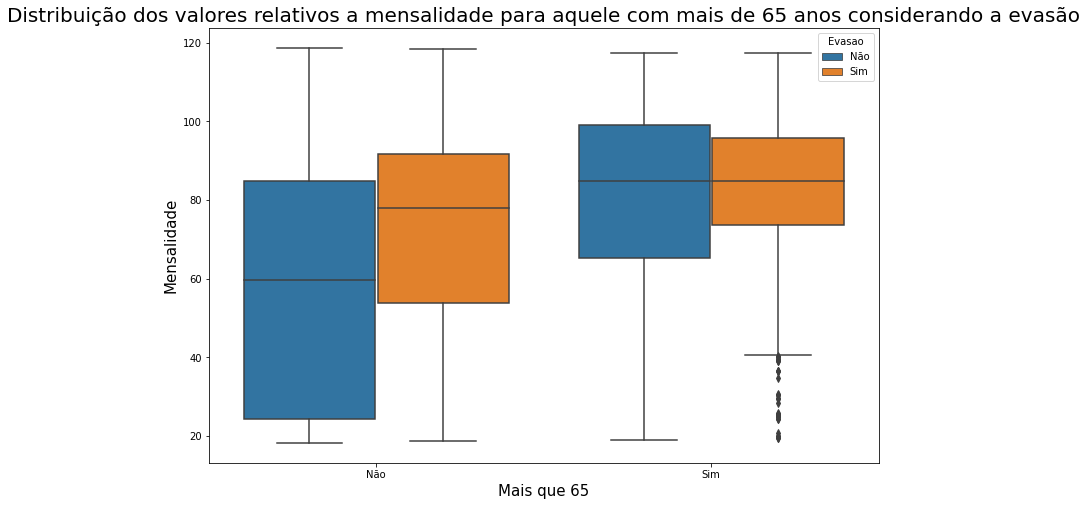

In [ ]:
#Plotando um boxplot para observar a distribuição da mensalidade para os Idosos.
ax = sns.boxplot(x = 'Idoso', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores relativos a mensalidade para aquele com mais de 65 anos considerando a evasão',fontsize = 20
             )
ax.set_xlabel('Mais que 65', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

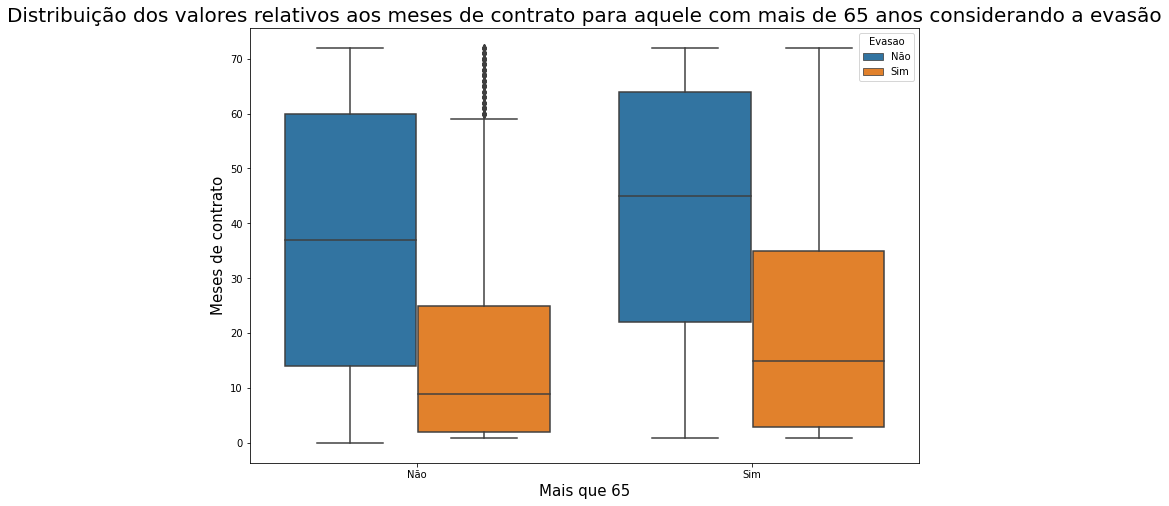

In [ ]:
#Plotando o gráfico para visualizar a distribuição dos meses de contrato dos idosos.
ax = sns.boxplot(x = 'Idoso', y = 'Contratacao_meses', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores relativos aos meses de contrato para aquele com mais de 65 anos considerando a evasão', fontsize = 20)
ax.set_xlabel('Mais que 65', fontsize = 15)
ax.set_ylabel('Meses de contrato', fontsize = 15)
plt.show()

Aqui foi observado que os valores encontrados para aquele que possuem mais de 65 anos são bem próximos, então depois de observar os boxplot que consideram as variáveis Cobrança mensal e Meses de contrato, acredito que este resultado seja justificado pelo fato do valor cobrado para os idosos serem relativamente mais altos, implicando possívelmente em uma saída precoce desses clientes. 

### Observação da variável Parceiro e a variável target

In [ ]:
#Tabela de dupla entrada
tabela_dupla = pd.crosstab(index = df['Parceiro'], columns= df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Parceiro,,
Não,2441,1200
Sim,2733,669


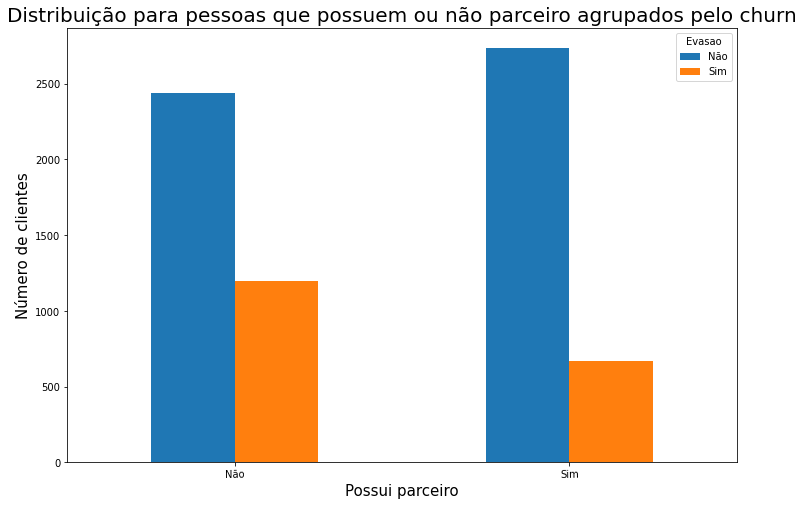

In [ ]:
# Plotando um gráfico de barras para visualizar a distribuição acima
tabela_dupla.plot.bar(rot = 1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para pessoas que possuem ou não parceiro agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui parceiro', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()



Os valores encontrados para aqueles que não possuem parceiro chamam a atenção, visto que a quantidade de pessoas que não possuem parceiro e que deixaram de ser clientes do Alura voz é praticamente a metade da quantidade referente a aquele que tambem não possuem parceiro e se mantem como clientes.

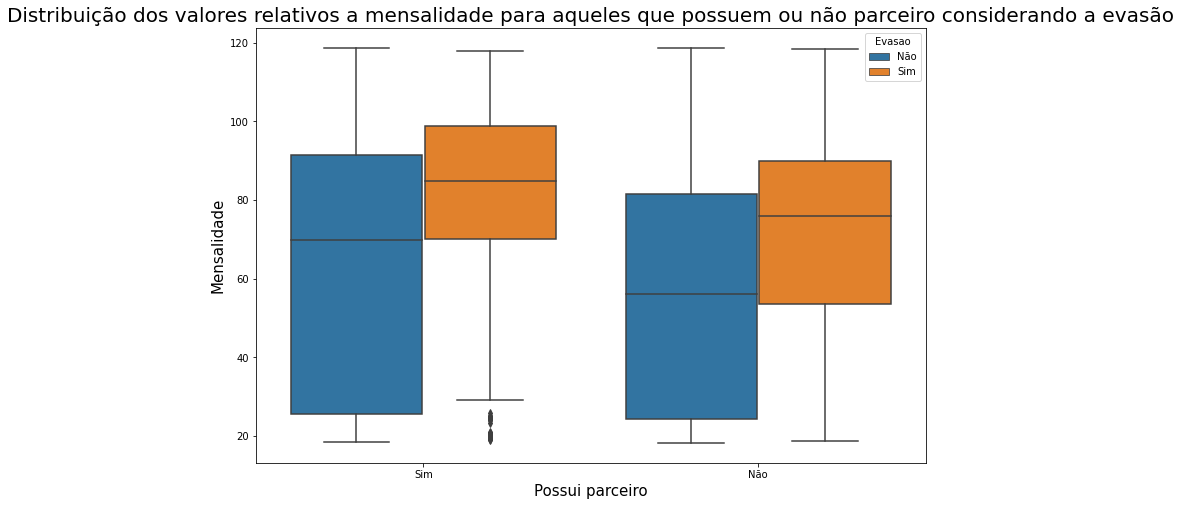

In [ ]:
#Plotando um boxplot para observar a distribuição da mensalidade para as pessoas que tem ou não parceiro.
ax = sns.boxplot(x = 'Parceiro', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores relativos a mensalidade para aqueles que possuem ou não parceiro considerando a evasão',fontsize = 20)
ax.set_xlabel('Possui parceiro', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

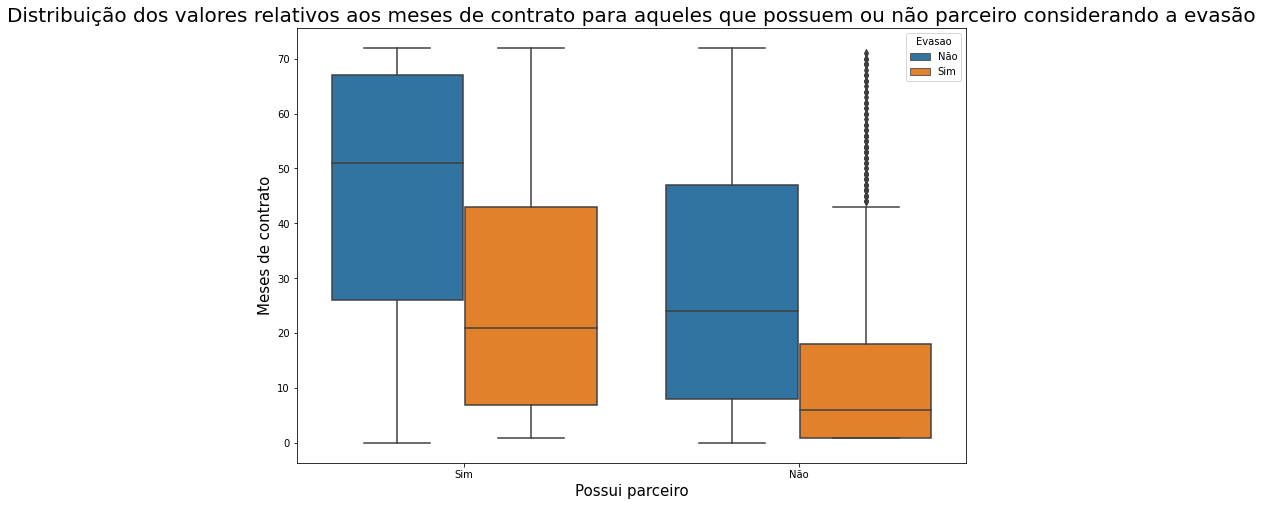

In [ ]:
#Plotando o gráfico para visualizar a distribuição dos meses de contrato de pessoas que possuem ou não parceiro.
ax = sns.boxplot(x = 'Parceiro', y = 'Contratacao_meses', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores relativos aos meses de contrato para aqueles que possuem ou não parceiro considerando a evasão', fontsize = 20)
ax.set_xlabel('Possui parceiro', fontsize = 15)
ax.set_ylabel('Meses de contrato', fontsize = 15)
plt.show()

Aqui os valores encontrados tambem podem estar relacionados com o preço cobrado para clientes mais novos, novamente é possível observar que existe uma relação entre o valor cobrado e tempo de permanência como cliente.

###Observação da variável Dependentes

In [ ]:
#Tabela de dupla entrada para Dependentes
tabela_dupla = pd.crosstab(index = df['Dependentes'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Dependentes,,
Não,3390,1543
Sim,1784,326


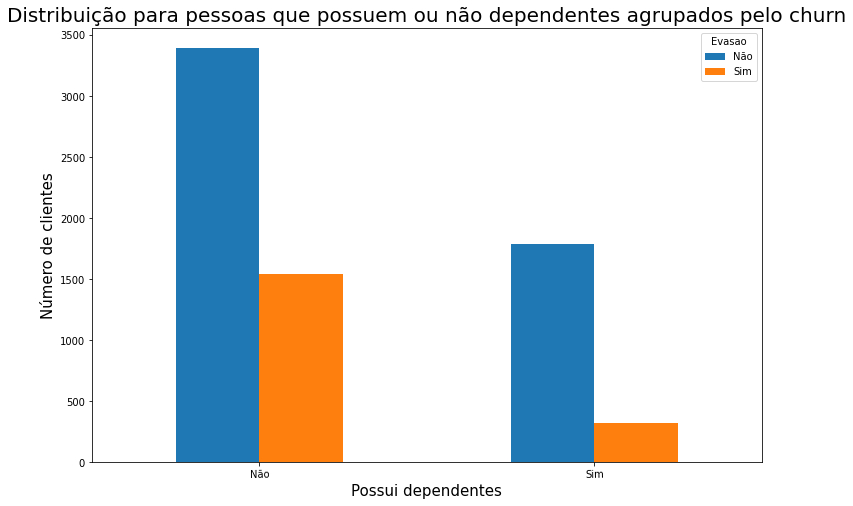

In [ ]:
#Visualizando a tabela acima com um gráfico de barras
tabela_dupla.plot.bar(rot = 1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para pessoas que possuem ou não dependentes agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui dependentes', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

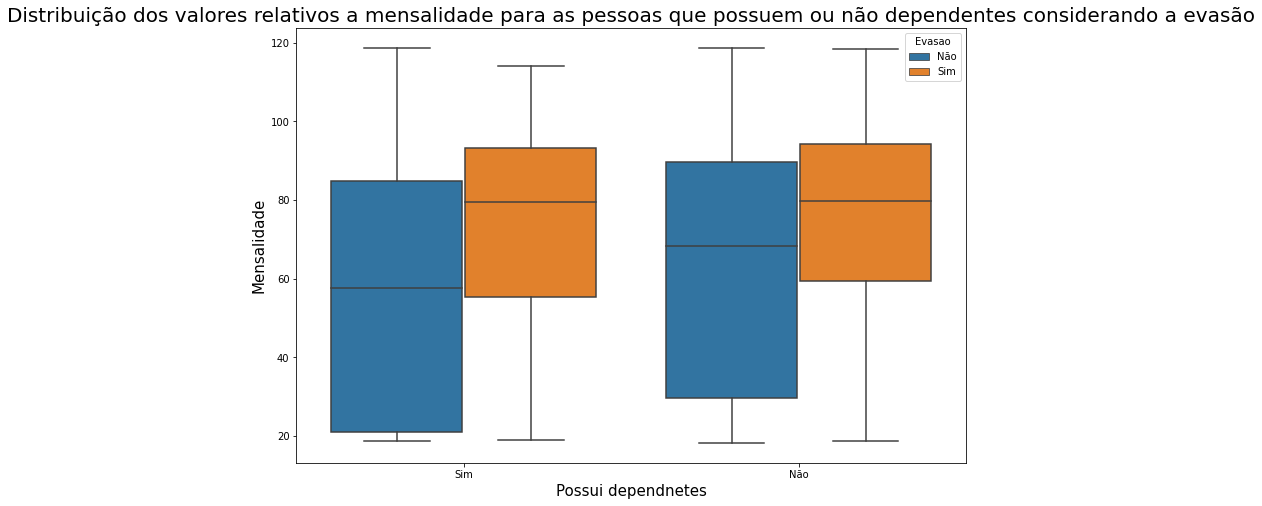

In [ ]:
#Plotando um boxplot para observar a distribuição da mensalidade para as pessoas que possuem ou não dependentes.
ax = sns.boxplot(x = 'Dependentes', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores relativos a mensalidade para as pessoas que possuem ou não dependentes considerando a evasão',fontsize = 20)
ax.set_xlabel('Possui dependnetes', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

Pode ser que exista alguma relação entre aquele que não possuem parceiro e aquele que tambem não possuem dependentes, uma vez que apesar dos valores relativos a estas variáveis sejam diferentes, ela apresentam o mesmo comportamento ou muito similares. 

### Observação da variável Serviço telefonico

In [ ]:
# Tabela de dupla entrada para Serviço telefônico.
tabela_dupla = pd.crosstab(index=df['Servico_telefonia'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Servico_telefonia,,
Não,512,170
Sim,4662,1699


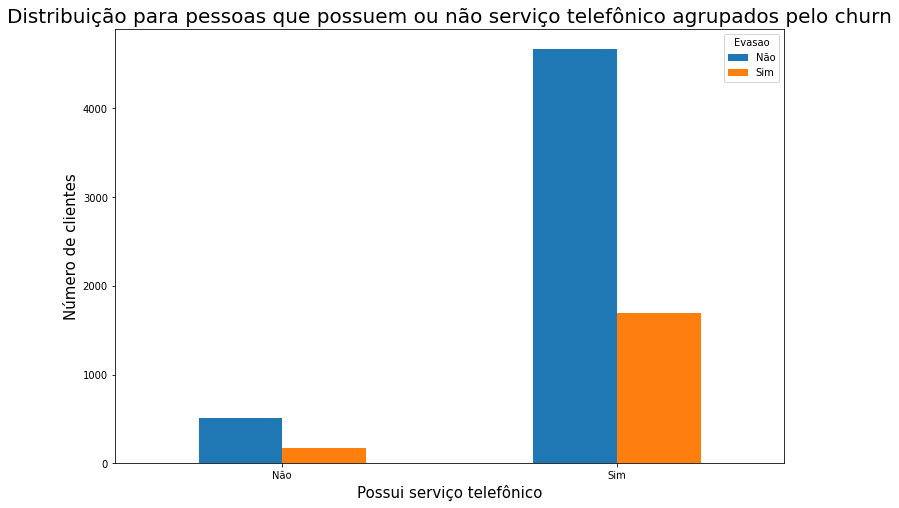

In [ ]:
#Plotando um gráfico de barras para visualizar a tabela acima.
tabela_dupla.plot.bar(rot = 1, figsize=(12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para pessoas que possuem ou não serviço telefônico agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui serviço telefônico', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

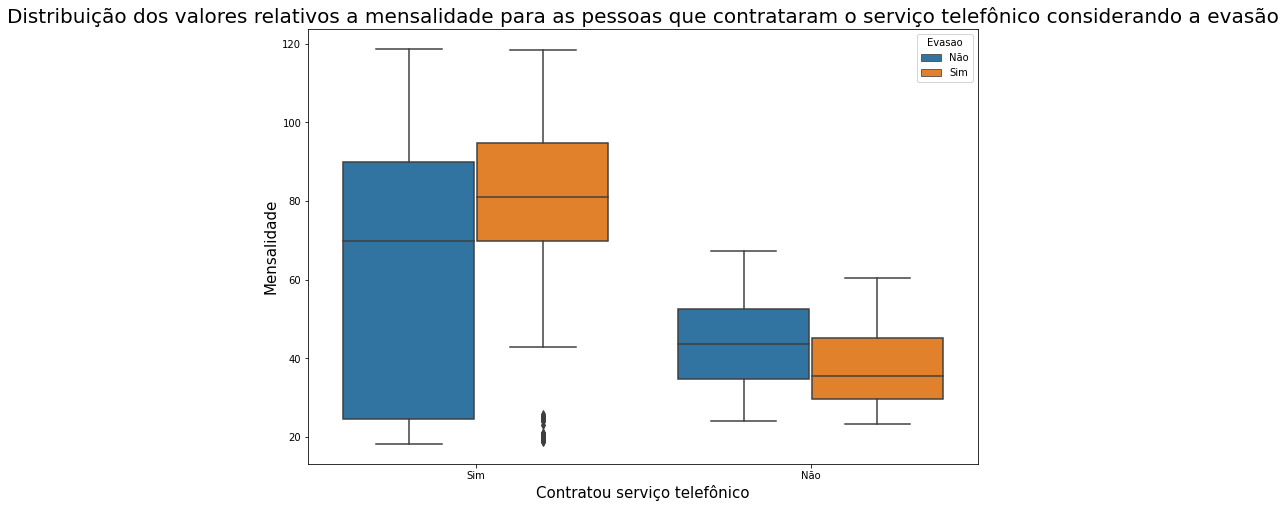

In [ ]:
#Plotando um boxplot para observar a distribuição da mensalidade para as pessoas que contrataram o serviço telefônico.
ax = sns.boxplot(x = 'Servico_telefonia', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores relativos a mensalidade para as pessoas que contrataram o serviço telefônico considerando a evasão',fontsize = 20)
ax.set_xlabel('Contratou serviço telefônico', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

**Esse boxplot parece indicar que o valor alto na mensalidade pode estar relacionado com a contratação do serviço telefônico**

### Observando a variável multiplas linhas

In [ ]:
#Tabela de dupla entrada para Multiplas linhas
tabela_dupla = pd.crosstab(index = df['Linhas_multiplas'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Linhas_multiplas,,
Não,2541,849
Sem serviço de telefonia,512,170
Sim,2121,850


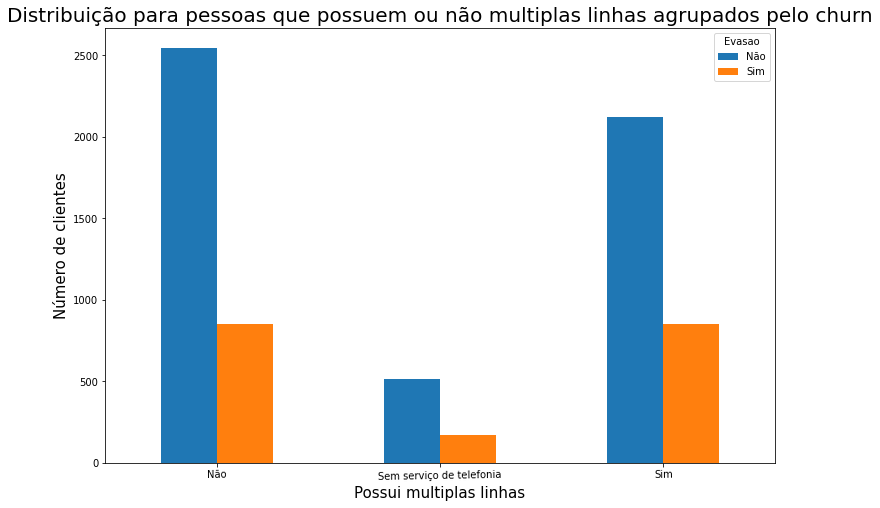

In [ ]:
#Plotando um gráfico de barras para visualizar os dados da tabela acima
tabela_dupla.plot.bar(rot = 1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para pessoas que possuem ou não multiplas linhas agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui multiplas linhas', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

Observando essas distribuição acredito que seja possível considerar que o fato de possuir ou não linhas multiplas não seja um fator que influencie aos clientes a deixarem a empresa, visto que os valores encontrados para ambos são basicamente os mesmos, apesar do numero de cliente com linha única ser maior.


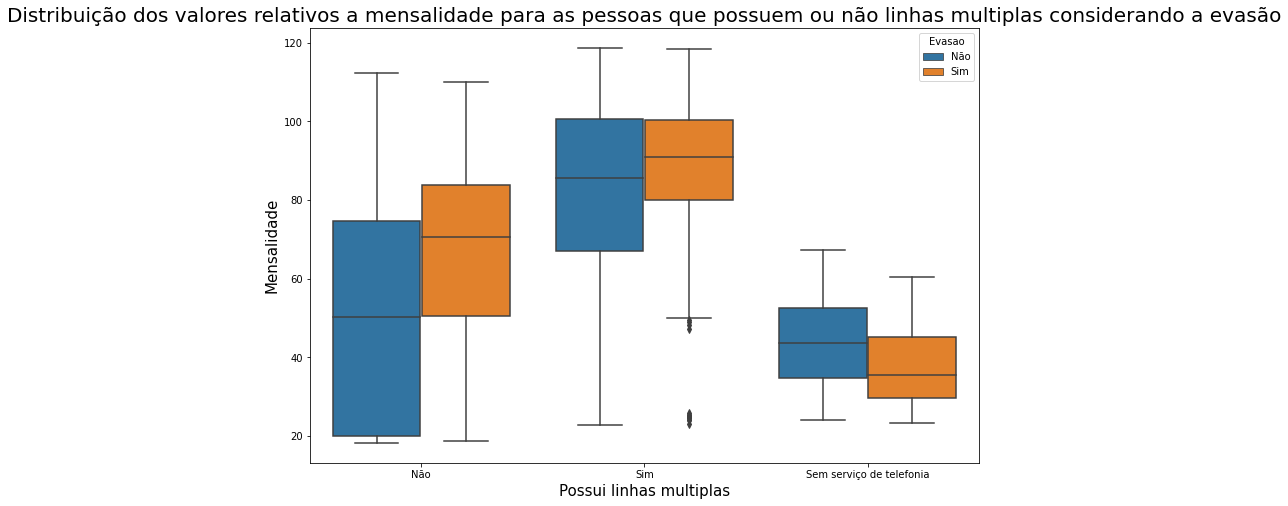

In [ ]:
#Plotando um boxplot para observar a distribuição da mensalidade para as pessoas que possuem ou não linhas multiplas.
ax = sns.boxplot(x = 'Linhas_multiplas', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição dos valores relativos a mensalidade para as pessoas que possuem ou não linhas multiplas considerando a evasão',fontsize = 20)
ax.set_xlabel('Possui linhas multiplas', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

### Observação da variável Serviço_intenet

In [ ]:
#Tabela de dupla entrada
tabela_dupla = pd.crosstab(index = df['Servico_internet'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Servico_internet,,
DSL,1962,459
Fibra ótica,1799,1297
Não,1413,113


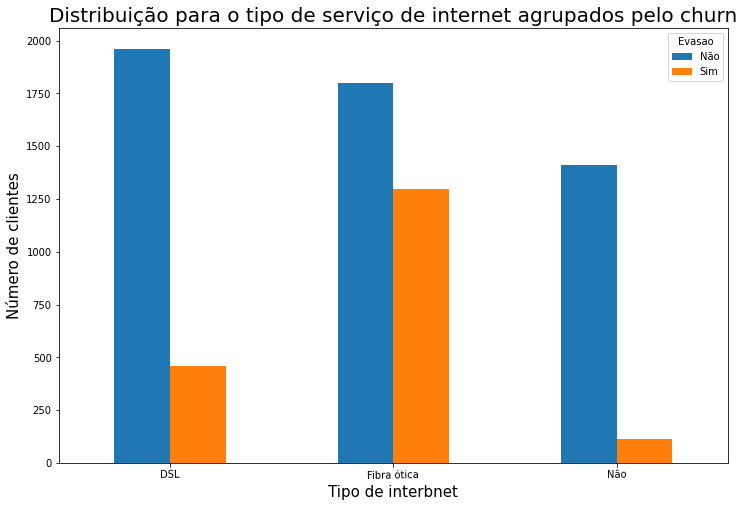

In [ ]:
#Plotando o gráfico de barras
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para o tipo de serviço de internet agrupados pelo churn', fontsize = 20)
plt.xlabel('Tipo de interbnet', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

Parece existir algum problema com a internet de fibra ótica, o numero de clientes que sairam é muito alto

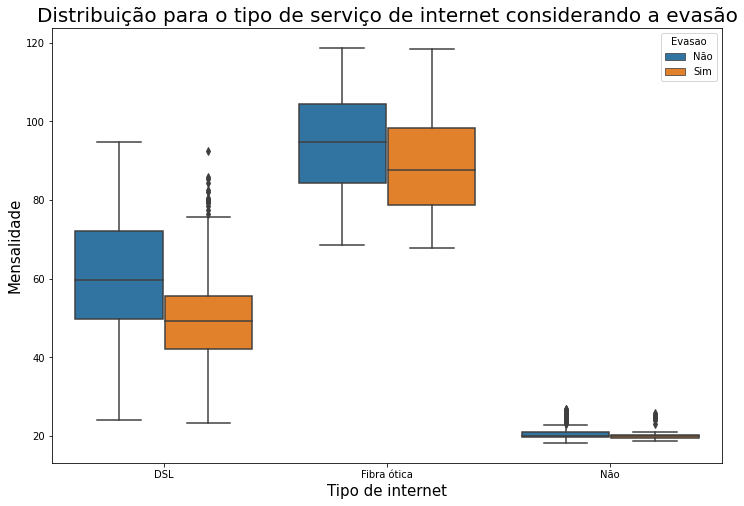

In [ ]:
#Plotando um boxplot com as variáveis Serviço_internet, Evasão e Cobrança_mensal
ax = sns.boxplot(x = 'Servico_internet', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição para o tipo de serviço de internet considerando a evasão',fontsize = 20)
ax.set_xlabel('Tipo de internet', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

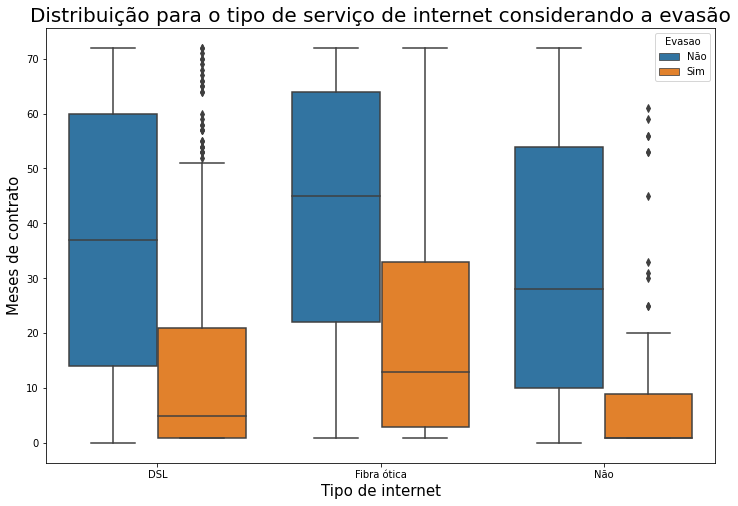

In [ ]:
#Plotando um boxplot com as variáveis Serviço_internet, Evasão e Contratação_meses
ax = sns.boxplot(x = 'Servico_internet', y = 'Contratacao_meses', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição para o tipo de serviço de internet considerando a evasão',fontsize = 20)
ax.set_xlabel('Tipo de internet', fontsize = 15)
ax.set_ylabel('Meses de contrato', fontsize = 15)
plt.show()

Considerações acerca dos resultados:
*   O valor alto de clientes que saíram e que possuíam fibra ótica foi o primeiro ponto que se destacou dentre os resultados encontrados, é possível que isso seja consequência do preço cobrado pelo serviço, somado a outras variáveis que não estão presentes no conjunto de dados.

*   As pessoas que não possuem serviço de internet são as que apresentam a menor mensalidade. No entanto, quando foi observado sua relação com os meses de contrato, é possível notar que a maior parte dos clientes que resolveram deixar a empresa fez isso antes de completar 10 meses de contrato. **O que pode indicar um problema na qualidade do serviço prestado ou na retençao de novos clientes.**







###Observação da variável Segurança_online

In [ ]:
#Criando a tabela de dupla entrada para Serviço_online
tabela_dupla=pd.crosstab(index=df['Seguranca_online'], columns=df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Seguranca_online,,
Não,2037,1461
Sem serviço de internet,1413,113
Sim,1724,295


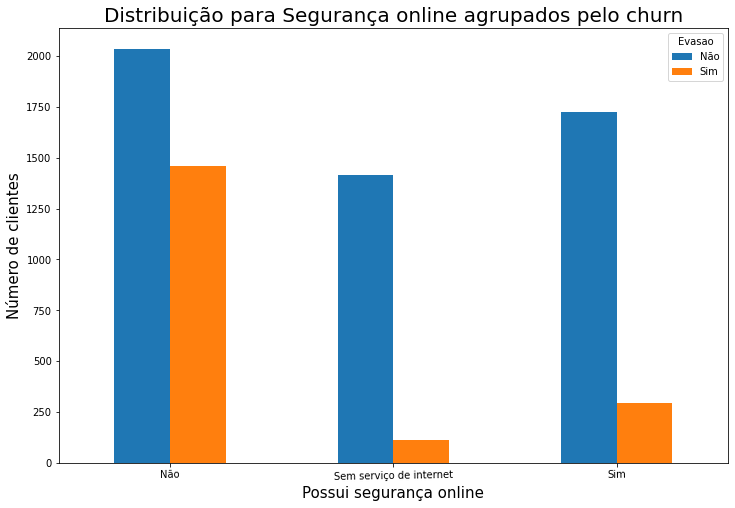

In [ ]:
#Plotando gráfico de barras para visualizar os dados acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para Segurança online agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui segurança online', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

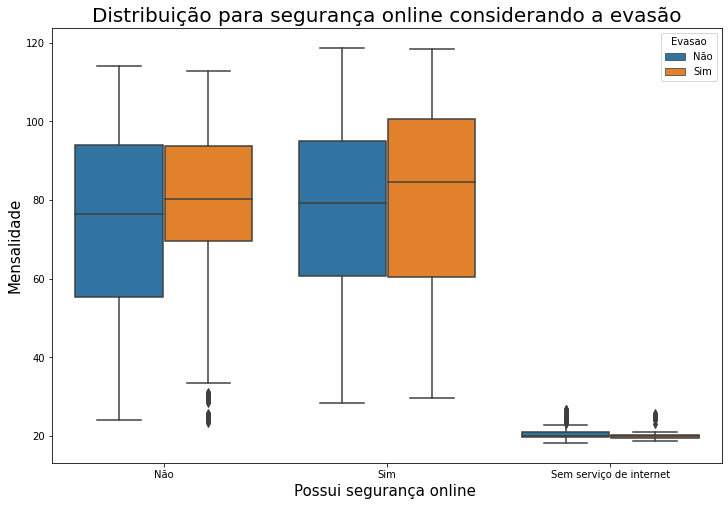

In [ ]:
#Plotando um boxplot com as variáveis Serviço_internet, Evasão e Cobrança_mensal
ax = sns.boxplot(x = 'Seguranca_online', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição para segurança online considerando a evasão',fontsize = 20)
ax.set_xlabel('Possui segurança online ', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

Os clientes que não possuem serviço de segurança online apresentam uma quantidade de saída maior do que aqueles que contrataram esse serviço. Além disso, ao verificar o valor da mensalidade pago por eles, algo que me chamou a atenção foi o fato do valor cobrado para ambos os grupos serem bem próximo.

###Observação da variável Backup_online

In [ ]:
#Tabela de dupla entrada para Backup Online
tabela_dupla = pd.crosstab(index = df['Backup_online'],columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Backup_online,,
Não,1855,1233
Sem serviço de internet,1413,113
Sim,1906,523


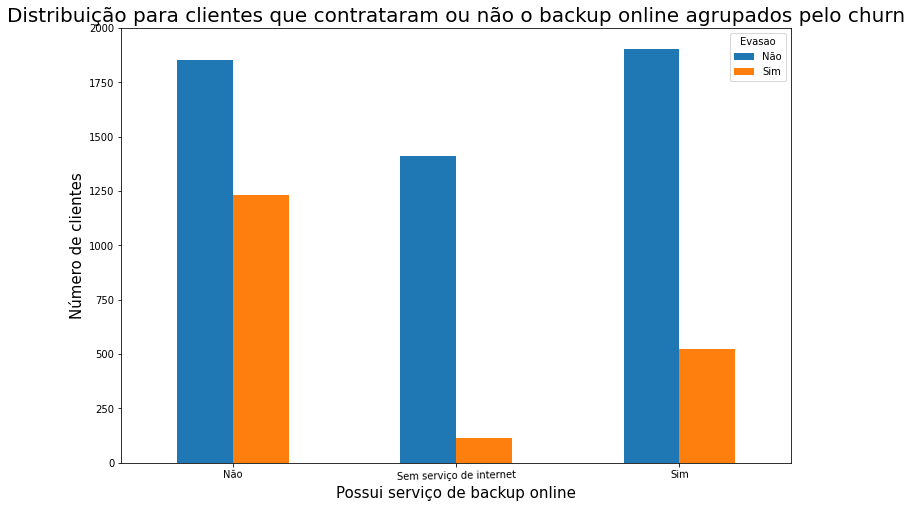

In [ ]:
#Plotando um gráfico de barras para visualizar os dados acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para clientes que contrataram ou não o backup online agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui serviço de backup online', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

### Observação da variável Proteção de dispositivos

In [ ]:
#Tabela de dupla entrada para o serviço de proteção de dispositivos
tabela_dupla = pd.crosstab(index = df['Protecao_dispositivos'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Protecao_dispositivos,,
Não,1884,1211
Sem serviço de internet,1413,113
Sim,1877,545


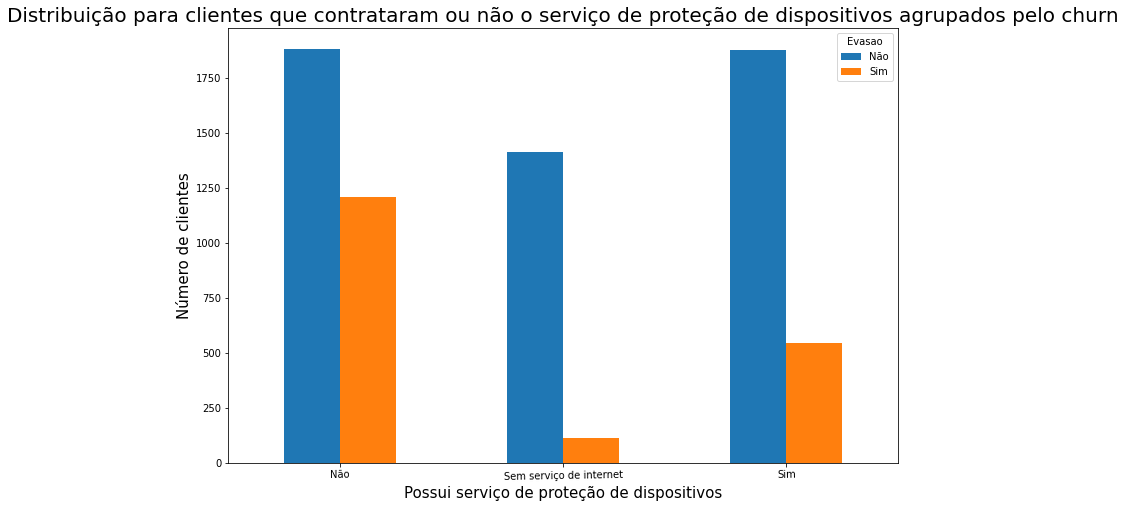

In [ ]:
#plotando uma gráfico de barras
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para clientes que contrataram ou não o serviço de proteção de dispositivos agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui serviço de proteção de dispositivos', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

###Observação da variável Suporte técnico

In [ ]:
#Tabela de dupla entrada para a variável suporte técnico
tabela_dupla = pd.crosstab(index = df['Suporte_tecnico'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Suporte_tecnico,,
Não,2027,1446
Sem serviço de internet,1413,113
Sim,1734,310


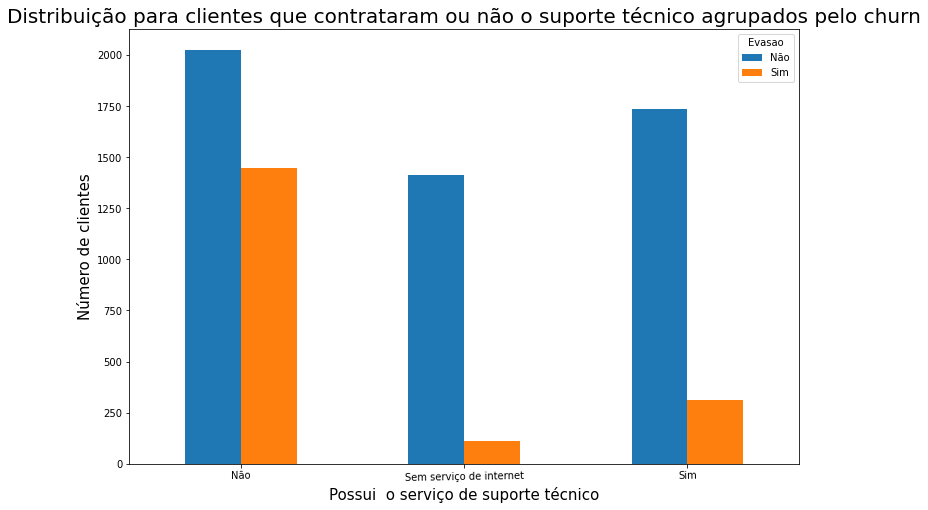

In [ ]:
#Plotando um gráfico de barras com os dados acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para clientes que contrataram ou não o suporte técnico agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui  o serviço de suporte técnico', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

*    As variáveis relativas aos serviços de **Segurança Oline**, **Backup Online**, **Proteção de Dispositivos** e **Suporte Técnico** apresentam um comportamento muito parecido, existe um número muito grande de clientes que não contrataram esses serviços e que deixaram a Alura Voz. 
*   Talvez seja interessante colocar todos esses serviços em um espécie de pacote que vem junto com a contratação do serviço de internet, sem atribuir um acréscimo no valor da mensalidade.

###Observação da variável Tv a cabo

In [ ]:
#Tabela de dupla entrada para a variável Tv a cabo
tabela_dupla = pd.crosstab(index = df['Tv_a_cabo'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Tv_a_cabo,,
Não,1868,942
Sem serviço de internet,1413,113
Sim,1893,814


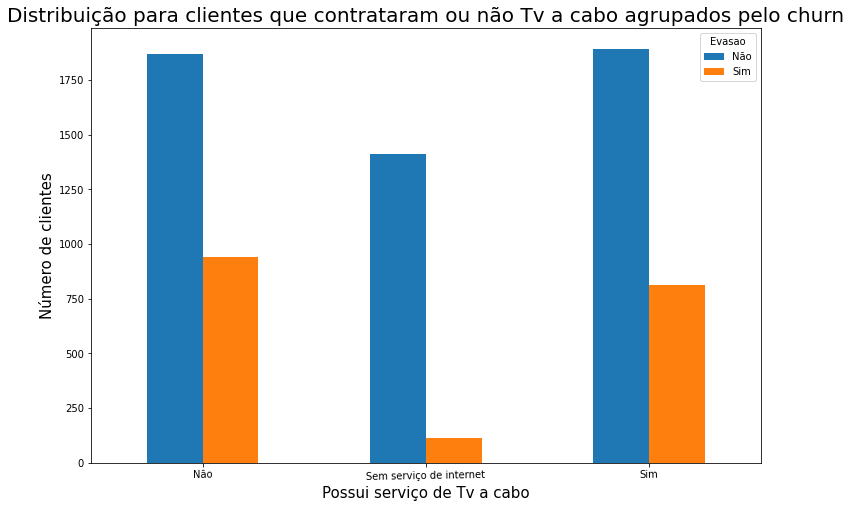

In [ ]:
#Plotando um gráfico de barras com base na tabela acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para clientes que contrataram ou não Tv a cabo agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui serviço de Tv a cabo', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

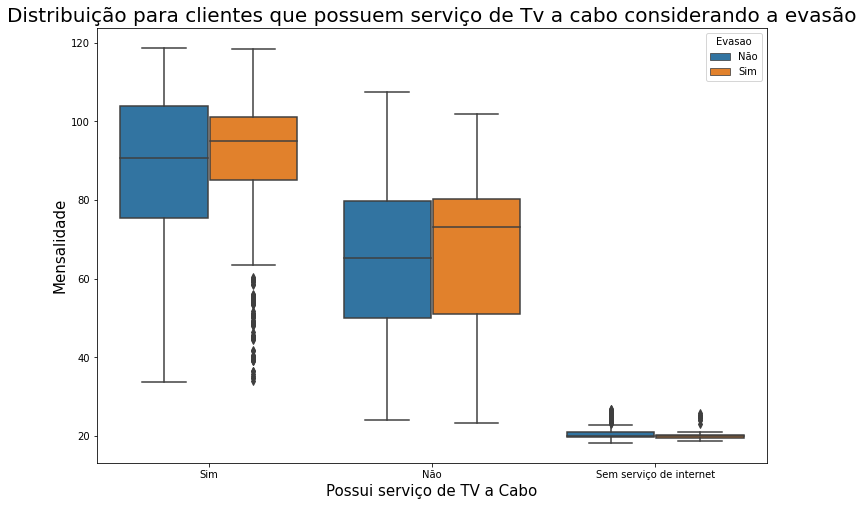

In [ ]:
#Plotando um boxplot com as variáveis Tv a cabo, Evasão e Cobrança_mensal
ax = sns.boxplot(x = 'Tv_a_cabo', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição para clientes que possuem serviço de Tv a cabo considerando a evasão',fontsize = 20)
ax.set_xlabel('Possui serviço de TV a Cabo', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

### Observação da variável Streaming de filmes

In [ ]:
#Tabela de dupla entrada para a variável Streaming de filmes
tabela_dupla = pd.crosstab(index = df['Streaming_filmes'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Streaming_filmes,,
Não,1847,938
Sem serviço de internet,1413,113
Sim,1914,818


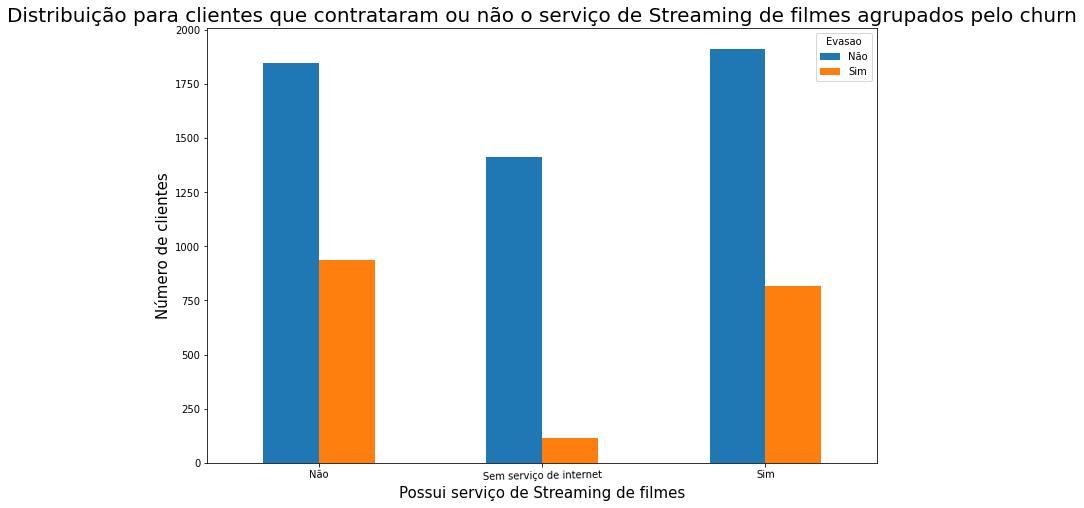

In [ ]:
#Plotando um gráfico de barras para os dados da tabela acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para clientes que contrataram ou não o serviço de Streaming de filmes agrupados pelo churn', fontsize = 20)
plt.xlabel('Possui serviço de Streaming de filmes', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

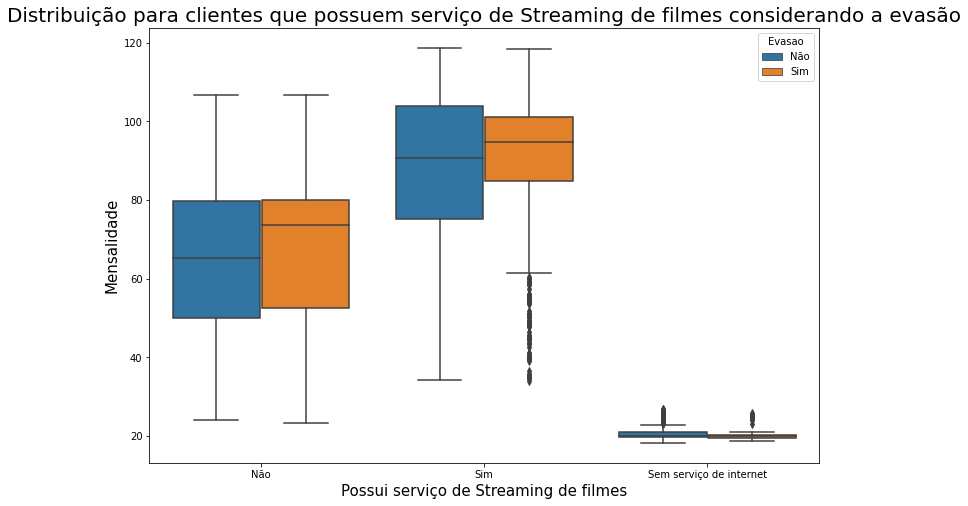

In [ ]:
#Plotando um boxplot com as variáveis Streaming de Filmes, Evasão e Cobrança_mensal
ax = sns.boxplot(x = 'Streaming_filmes', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição para clientes que possuem serviço de Streaming de filmes considerando a evasão',fontsize = 20)
ax.set_xlabel('Possui serviço de Streaming de filmes', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

Já as variáveis **Tv a Cabo** e **Streaming de filmes** apresentam valores e comportamentos bem parecidos entre si, ambos os grupos, vistos nas duas variáveis apresentam valores elevados de clientes que deixaram a Alura Voz.

###Observação da variável Contrato

In [ ]:
#Tabela de dupla entrada para a variável Contrato
tabela_dupla = pd.crosstab(index = df['Contrato'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Contrato,,
Anual,1307,166
Bianual,1647,48
Mês a Mês,2220,1655


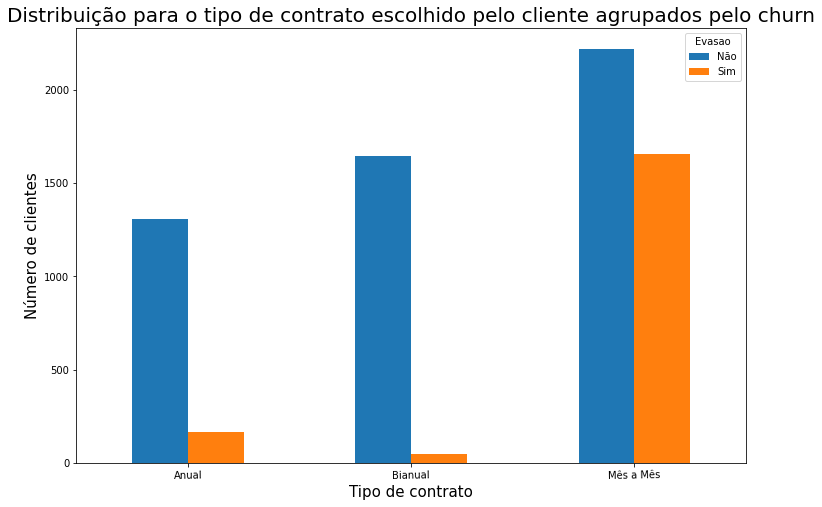

In [ ]:
#Plotando um gráfico de barras para os dados da tabela acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para o tipo de contrato escolhido pelo cliente agrupados pelo churn', fontsize = 20)
plt.xlabel('Tipo de contrato', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

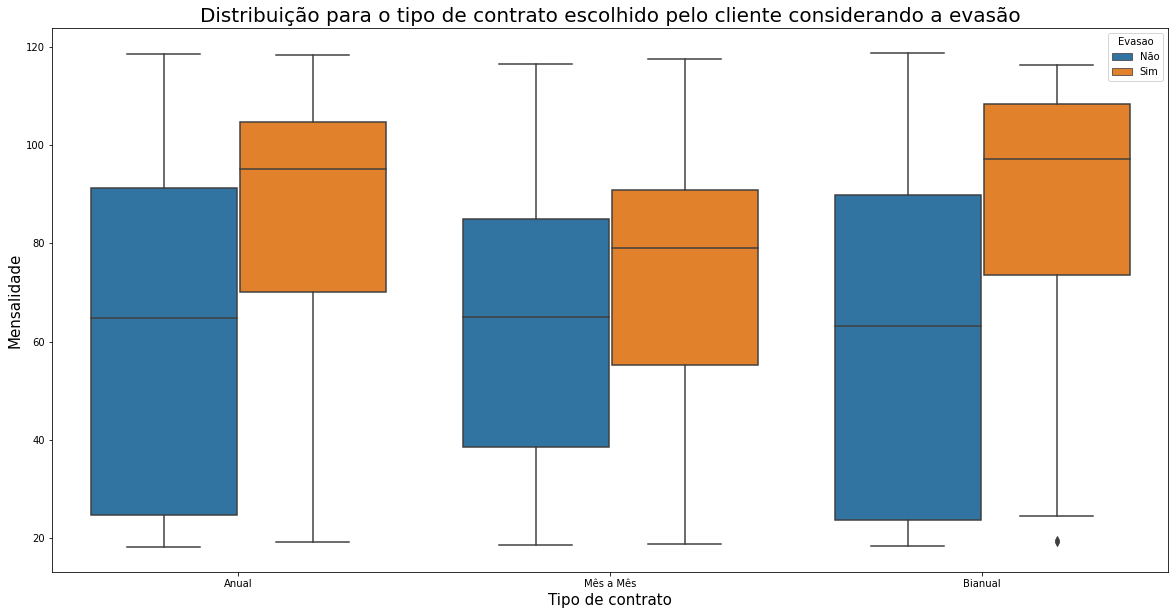

In [ ]:
#Plotando um boxplot com as variáveis Contrato, Evasão e Cobrança_mensal
ax = sns.boxplot(x = 'Contrato', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(20,10)
ax.set_title('Distribuição para o tipo de contrato escolhido pelo cliente considerando a evasão',fontsize = 20)
ax.set_xlabel('Tipo de contrato', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

No tipo de contratação mensal a rotatividade de clientes pode ter uma tendência de ser maior, visto que ele pode não renovar o contrato no mês seguinte.
Por isso, acredito que seria interessante criar maneiras de estimular o cliente a aderir aos contratos Anuais e Bianuais mostrando as vantagens desses tipos de contratos.

###Observação da variável Conta Digital

In [ ]:
#Tabela de dupla entrada para Conta Digital
tabela_dupla = pd.crosstab(index = df['Conta_digital'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Conta_digital,,
Não,2403,469
Sim,2771,1400


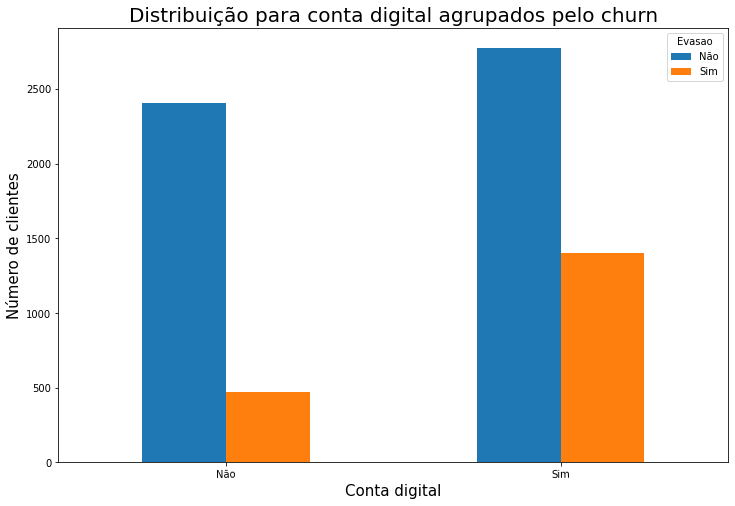

In [ ]:
#Plotando um gráfico de barras para os dados da tabela acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para conta digital agrupados pelo churn', fontsize = 20)
plt.xlabel('Conta digital', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

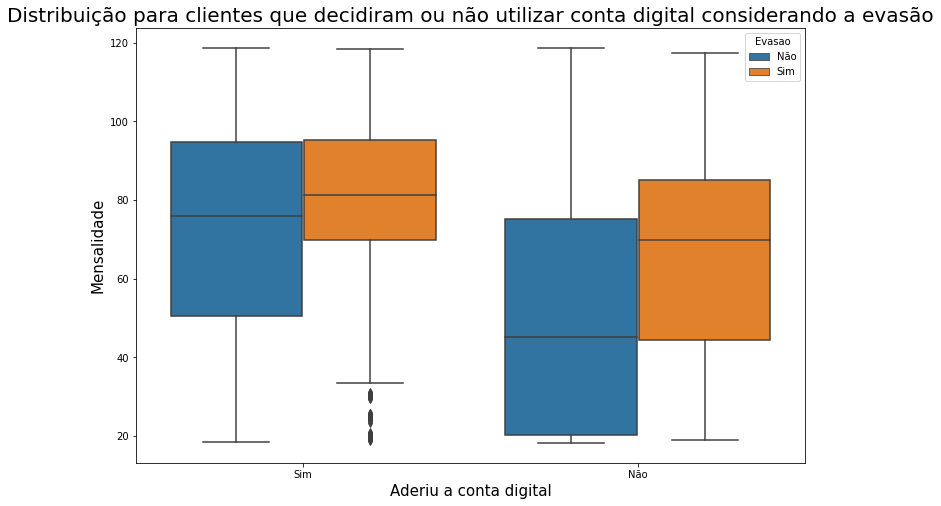

In [ ]:
#Plotando um boxplot com as variáveis Conta_digital, Evasão e Cobrança_mensal
ax = sns.boxplot(x = 'Conta_digital', y = 'Cobranca_mensal', hue = 'Evasao', data = df)
ax.figure.set_size_inches(12,8)
ax.set_title('Distribuição para clientes que decidiram ou não utilizar conta digital considerando a evasão',fontsize = 20)
ax.set_xlabel('Aderiu a conta digital', fontsize = 15)
ax.set_ylabel('Mensalidade', fontsize = 15)
plt.show()

Por qual motivo os clientes que aderiram a conta digital tem uma mensalidade maior?

###Observando a variável método de pagamento

In [ ]:
#Tabela de dupla entrada para o Método de pagamento
tabela_dupla = pd.crosstab(index = df['Metodo_pagamento'], columns = df['Evasao'])
tabela_dupla

Evasao,Não,Sim
Metodo_pagamento,,
Cartão de Credito,1290,232
Cheque,1304,308
Cheque Eletrônico,1294,1071
Débito Automático,1286,258


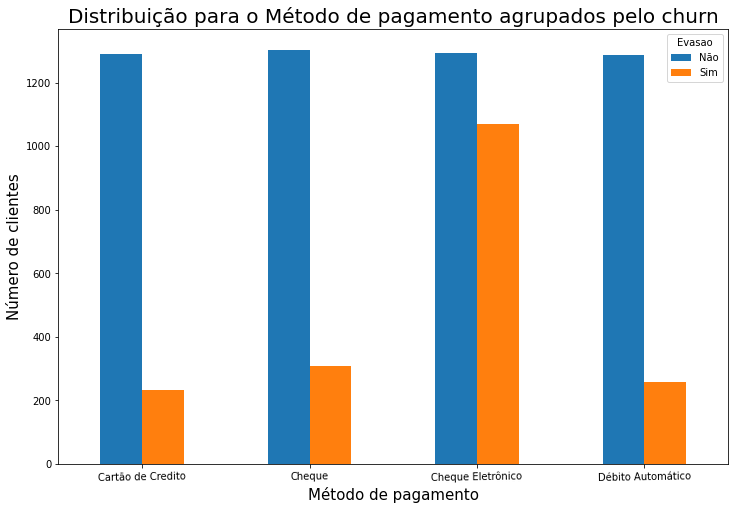

In [ ]:
#Plotando um gráfico de barras para os dados da tabela acima
tabela_dupla.plot.bar(rot=1, figsize = (12,8))
plt.legend(title = 'Evasao')
plt.title('Distribuição para o Método de pagamento agrupados pelo churn', fontsize = 20)
plt.xlabel('Método de pagamento', fontsize = 15)
plt.ylabel('Número de clientes', fontsize = 15)
plt.show()

Por que os clientes que escolheram pagar por cheque eletronico apresentam o maior número de saídas?
- Será que eles escolheram o contrato mensal?
- Será que a Alura voz está tendo algum tipo de problema com esse método de pagamento, acarretando transtornos para o cliente e consequentemente perdendo-os?
- Será que pode estar relacionado com acréscimos para esse tipo de pagamento?

##Verificando a correlação entre as variáveis


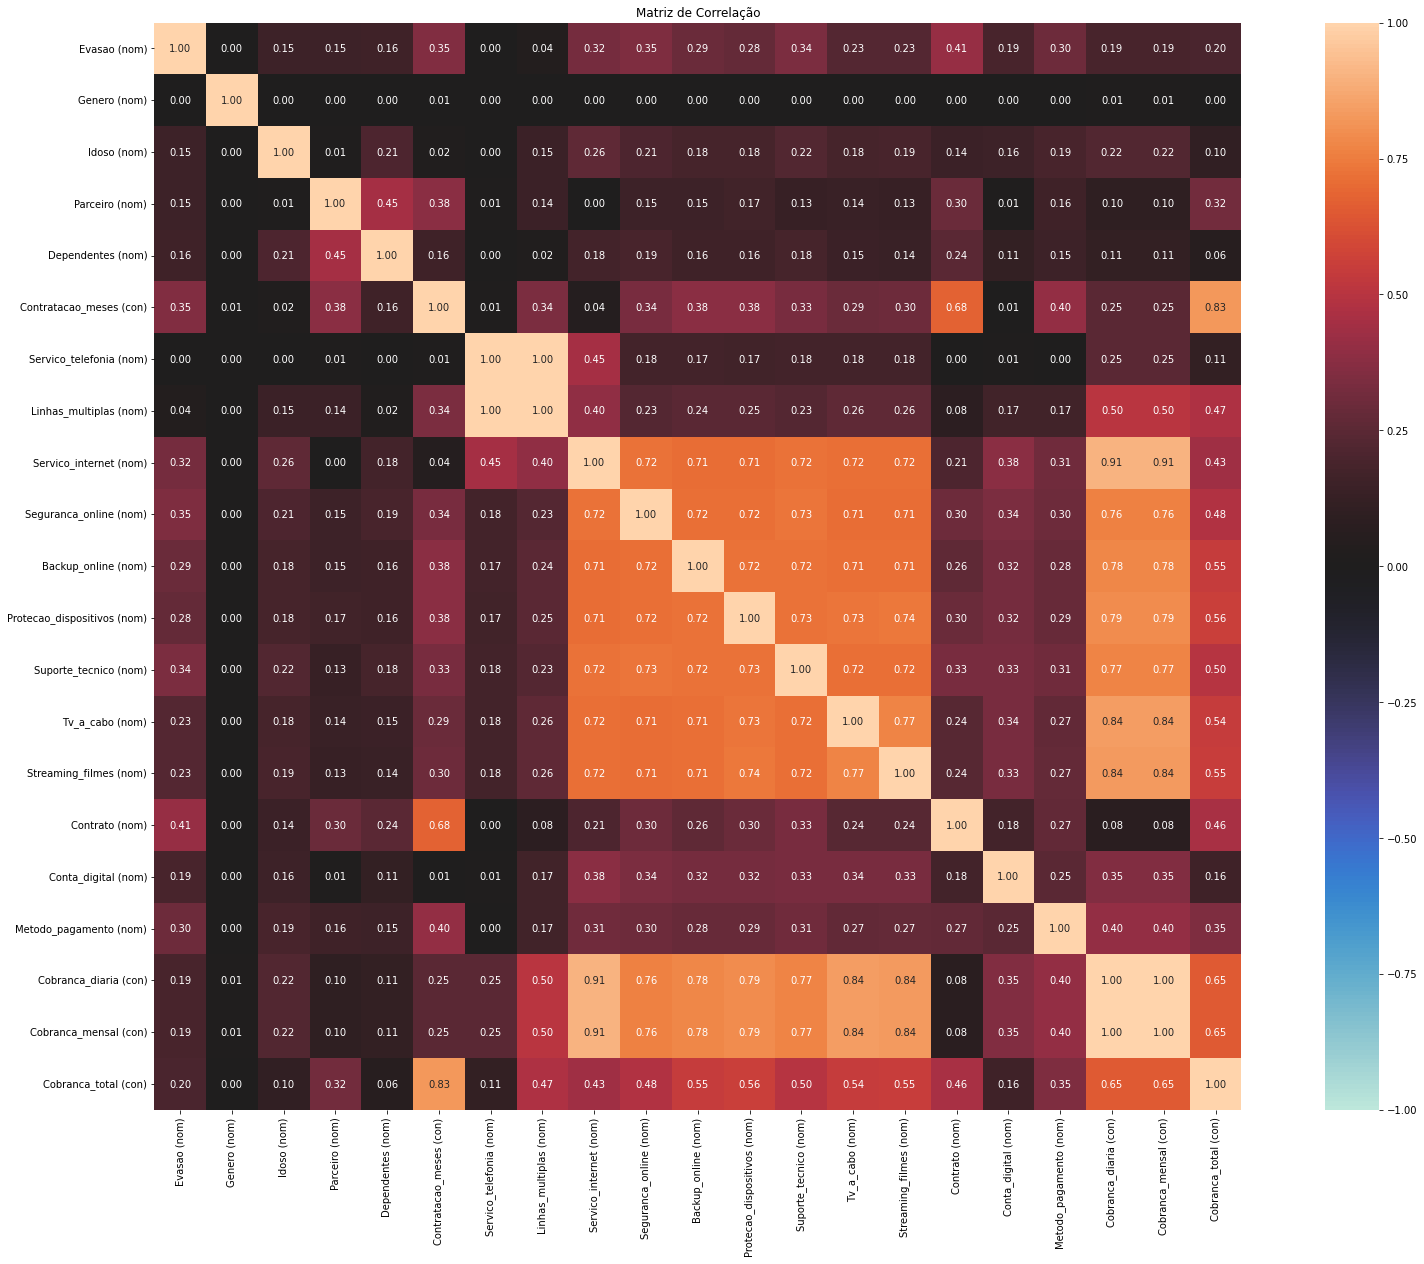

In [ ]:
#Importando a biblioteda do dython para plotar um gráfico de correlação que contemple as variáveis categóricas
from dython import nominal

#Plotando o gráfico de correlação
ax = nominal.associations(df.iloc[:,1:], figsize = (30,20), mark_columns = True, title = 'Matriz de Correlação')
plt.show()

   É possível observar que não existe uma correlação muito forte entre a variável target (Evasão) e as demais variáveis presentes no dataset.
   
  A única que apresenta um valor que pode ser considerado um correlação moderada é a variável referente ao tipo de contrato (Contrato). As demais apresentam correções fracas ou nulas  

#Modelagem dos dados.


In [ ]:
#Visualizando o DataFrame
df.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_diaria,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mês a Mês,Não,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mês a Mês,Sim,Cheque Eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mês a Mês,Sim,Cheque Eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mês a Mês,Sim,Cheque,2.80,83.9,267.40


In [ ]:
#Verificando como estão distribuidos os dados em relação a variável target
n_registros = df.Evasao.count()
n_evasao = df.query("Evasao =='Sim'")['Evasao'].count()
n_clientes_ativos = n_registros - n_evasao
proporcao_evasao = (n_evasao / n_registros)*100
proporcao_clientes_ativos = (n_clientes_ativos / n_registros)*100
print('O conjunto de dados contem: %d registros.'% n_registros)
print('Onde o número de clientes ativos é igual a %d e corresponde a %.2f%% dos dados.' % (n_clientes_ativos, proporcao_clientes_ativos))
print('Já o número de clientes que deixaram a AluraVoz é igual a %d e corresponde a %.2f%% dos dados.'% (n_evasao, proporcao_evasao))

O conjunto de dados contem: 7043 registros.
Onde o número de clientes ativos é igual a 5174 e corresponde a 73.46% dos dados.
Já o número de clientes que deixaram a AluraVoz é igual a 1869 e corresponde a 26.54% dos dados.


Existe um notório desbalanceamento na variável alvo. Diante disso, será necessário decidir qual será a abordagem utilizada para diblar esse desbalanceamento.

##Encoding

In [ ]:
#Utilizando a subistituição
binarios = {'Sim': 1,
            'Não': 0}
outros = {'Sim':1,
          'Não':0,
          'Sem serviço de internet':2}
         
df['Evasao'] = df['Evasao'].map(binarios)
df['Idoso'] = df['Idoso'].map(binarios)
df['Parceiro'] = df['Parceiro'].map(binarios)
df['Dependentes'] = df['Dependentes'].map(binarios)
df['Servico_telefonia'] =df['Servico_telefonia'].map(binarios)
df['Conta_digital'] = df['Conta_digital'].map(binarios)
df['Streaming_filmes'] = df['Streaming_filmes'].map(outros)
df['Tv_a_cabo'] = df['Tv_a_cabo'].map(outros)
df['Protecao_dispositivos'] = df['Protecao_dispositivos'].map(outros)
df['Seguranca_online'] = df['Seguranca_online'].map(outros)
df['Backup_online'] = df['Backup_online'].map(outros)
df['Suporte_tecnico'] = df['Suporte_tecnico'].map(outros)
df['Linhas_multiplas'] = df['Linhas_multiplas'].map({'Sim':1, 'Não':0, 'Sem serviço de telefonia':2})

df.head()

,ID_cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Servico_internet,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Contrato,Conta_digital,Metodo_pagamento,Cobranca_diaria,Cobranca_mensal,Cobranca_total
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual,1,Cheque,2.19,65.6,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mês a Mês,0,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra ótica,0,0,1,0,0,0,Mês a Mês,1,Cheque Eletrônico,2.46,73.9,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra ótica,0,1,1,0,1,1,Mês a Mês,1,Cheque Eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra ótica,0,0,0,1,1,0,Mês a Mês,1,Cheque,2.80,83.9,267.40


In [ ]:
# Aplicando o método de One Hot Enconding para as variáveis Gênero, Contrato, Método de pagamento e Serviço de Internet(Tecnologia).
df = pd.get_dummies(data = df, columns = ['Genero', 'Contrato', 'Metodo_pagamento', 'Servico_internet']) 
df.head()

,ID_cliente,Evasao,Idoso,Parceiro,Dependentes,Contratacao_meses,Servico_telefonia,Linhas_multiplas,Seguranca_online,Backup_online,Protecao_dispositivos,Suporte_tecnico,Tv_a_cabo,Streaming_filmes,Conta_digital,Cobranca_diaria,Cobranca_mensal,Cobranca_total,Genero_Feminino,Genero_Masculino,Contrato_Anual,Contrato_Bianual,Contrato_Mês a Mês,Metodo_pagamento_Cartão de Credito,Metodo_pagamento_Cheque,Metodo_pagamento_Cheque Eletrônico,Metodo_pagamento_Débito Automático,Servico_internet_DSL,Servico_internet_Fibra ótica,Servico_internet_Não
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,0,1,1,0,1,2.19,65.6,593.30,1,0,1,0,0,0,1,0,0,1,0,0
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,0,0,0,1,0,2.00,59.9,542.40,0,1,0,0,1,0,1,0,0,1,0,0
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,0,0,0,1,2.46,73.9,280.85,0,1,0,0,1,0,0,1,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,1,0,1,1,1,3.27,98.0,1237.85,0,1,0,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,0,1,1,0,1,2.80,83.9,267.40,1,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
# Observação das informações do DataFrame após a adição das novas colunas.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID_cliente                          7043 non-null   object 
 1   Evasao                              7043 non-null   int64  
 2   Idoso                               7043 non-null   int64  
 3   Parceiro                            7043 non-null   int64  
 4   Dependentes                         7043 non-null   int64  
 5   Contratacao_meses                   7043 non-null   int64  
 6   Servico_telefonia                   7043 non-null   int64  
 7   Linhas_multiplas                    7043 non-null   int64  
 8   Seguranca_online                    7043 non-null   int64  
 9   Backup_online                       7043 non-null   int64  
 10  Protecao_dispositivos               7043 non-null   int64  
 11  Suporte_tecnico                     7043 no

In [ ]:
# Removendo a coluna 'ID_cliente'.
df = df.drop(columns = 'ID_cliente', axis = 1)

In [ ]:
# Criando as variáveis X e y para aplicação do modelo.
X = df.drop(columns = 'Evasao', axis = 1)
y = df['Evasao']

## Primeira abordagem.

  A primeira abordagem será a utilização dos dados sem fazer nenhuma alteração, ou seja, serão mantidos os dados desbanlancedos, somente aplicando tecnicas que ajudarão a manter a proporcionalidade dos dados, na tentativa de garantir que existam valores positivos e negativos nas base de treino e teste. 
  Porém antes disso será necessário definir uma linha de base como ponto de partida.





In [ ]:
# Criando uma função para rodar os modelos.
def roda_modelo(classificador):

# Definindo a SEED para garantir a replicabilidade.
    SEED = 7
    np.random.seed(SEED)

# Criando e treinando o modelo escolhido.
    modelo = classificador
    modelo.fit(X_train, y_train)
    return modelo

In [ ]:
#Função de previsão do modelo (y_pred).
def roda_previsoes(modelo):
  previsoes = modelo.predict(X_test)
  return previsoes

In [ ]:
# Criando uma função para visualização das métricas.
def metricas(y_test, previsoes):

# Testando as métricas do modelo.
    acuracia = accuracy_score(y_test, previsoes)*100
    precisao = precision_score(y_test, previsoes)*100
    recall = recall_score(y_test, previsoes)*100
    F1 = f1_score(y_test, previsoes)*100
    
    print('A acurácia deste modelo é : %.2f%%.'%acuracia)
    print('A precisão é de: %.2f%%'% precisao)
    print('A taxa de recall é de:%.2f%%'% recall)
    print('O taxa de balancemento do modelo é: %.2f%%'% F1)

# Plotando a matrix de confusão.
    mc = confusion_matrix(y_test, previsoes)
    disp = ConfusionMatrixDisplay(confusion_matrix= mc)
    disp.plot()

In [ ]:
# Criando função de plotagem da curva ROC.
from sklearn.metrics import roc_auc_score, roc_curve
def curva_roc(modelo, X_test, y_test):
#Calculando a probabilidade dos acontecimentos.
  prob_previsao = modelo.predict_proba(X_test)[:,1]  #* O [:,1] Quer dizer que nós queremos apenas o segundo valor de todas as linhas

#Calculando a Taxa de falsos positivos (tfp ou fpr) e a taxa de verdadeiros positivos (tvp ou tpr).
  tfp, tvp, limite = roc_curve(y_test, prob_previsao)

#Calculando a AUC
  auc = roc_auc_score(y_test, prob_previsao)

#Plotando o gráfico com a curva ROC.
  plt.subplots(1, figsize = (12,8))
  plt.title('Curva ROC', fontsize = 20)
  plt.plot(tfp,tvp, label = 'LR, auc ='+str(auc))
  plt.plot([0,1],[0,1],color = 'red', lw = 2, linestyle ='--') # Plotando a linha vermelha (Modelo aleatório)
  plt.plot([0,0], [1,0], color = 'green', lw = 2, linestyle ='--'), plt.plot([1,1], color ='green', lw = 2, linestyle = '--') # Plotando a linha verde (Modelo perfeito)
  plt.legend(loc = 4)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  plt.show()

In [ ]:
#Definindo a SEED para garantir a replicabilidade.
SEED = 7
np.random.seed(SEED)

# Criando uma função para realizar uma divisão aleatória e estratificada dos dados com o StratifiedShuffleSplit.
def executar_divisor(X,y):
  divisor = StratifiedShuffleSplit(n_splits = 5, test_size = 0.30, random_state= SEED)
  for treino_id, test_id in divisor.split(X, y):
    X_train, X_test = X[treino_id], X[test_id]
    y_train, y_test = y[treino_id], y[test_id]
  return X_train, X_test, y_train, y_test


In [ ]:
# Dividindo novamente o DataFrame entre X e y para a aplicação.
X = df.drop(['Evasao'], axis = 1).values
y = df['Evasao']
X_train, X_test, y_train, y_test = executar_divisor(X,y)

In [ ]:
# Mostrando como  está a divisão dos dados entre a base de treino e a base de teste.
base_treino = X_train.shape[0]
base_teste = X_test.shape[0]

print('A base de treino possui %s elementos e a base de teste possui %s elementos'%(base_treino, base_teste))

A base de treino possui 4930 elementos e a base de teste possui 2113 elementos


###Definindo a baseline com o DummyClassifier e o DecisionTreeClassifier

A acurácia deste modelo é : 60.53%.
A precisão é de: 25.23%
A taxa de recall é de:24.78%
O taxa de balancemento do modelo é: 25.00%


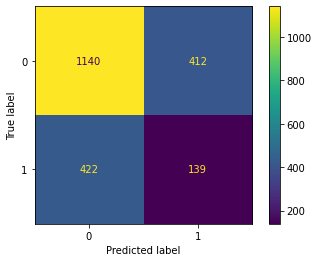

In [ ]:
#Rodando o DummyClassifier, prevendo os valores e exibindo as métricas para esse modelo.
modelo = roda_modelo(DummyClassifier(strategy='stratified'))
previsoes = roda_previsoes(modelo)
metricas(y_test, previsoes)

A acurácia deste modelo é : 79.60%.
A precisão é de: 63.10%
A taxa de recall é de:55.79%
O taxa de balancemento do modelo é: 59.22%


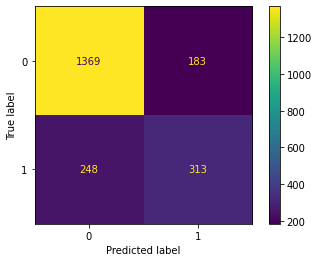

In [ ]:
#Rodando o DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
modelo = roda_modelo(DecisionTreeClassifier(max_depth = 5, random_state = SEED))
previsoes = roda_previsoes(modelo)
metricas(y_test, previsoes)

Como a ideia do projeto é diminuir o **Churn rate**, o modelo escolhido deve acertar o máximo possível dos valores positivos**(Sim)** e consequentemente, diminuindo desta forma os falsos positivos. Então a ideia é que ele tenha uma boa taxa de **Recall**, visto que é esssa métrica que considera a proporção de acertos dos verdadeiros positivos em relação a todos os valores positivos.

### Testando os modelos de RandomForestClassifier e AdaBoostClassifier

A acurácia deste modelo é : 80.93%.
A precisão é de: 72.70%
A taxa de recall é de:45.10%
O taxa de balancemento do modelo é: 55.67%


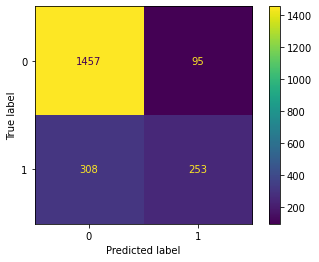

In [ ]:
# Rodando o RandomForest.
from sklearn.ensemble import RandomForestClassifier

modelo_rf = roda_modelo(RandomForestClassifier(max_depth = 5, random_state= SEED))
previsoes = roda_previsoes(modelo_rf)
metricas(y_test, previsoes)

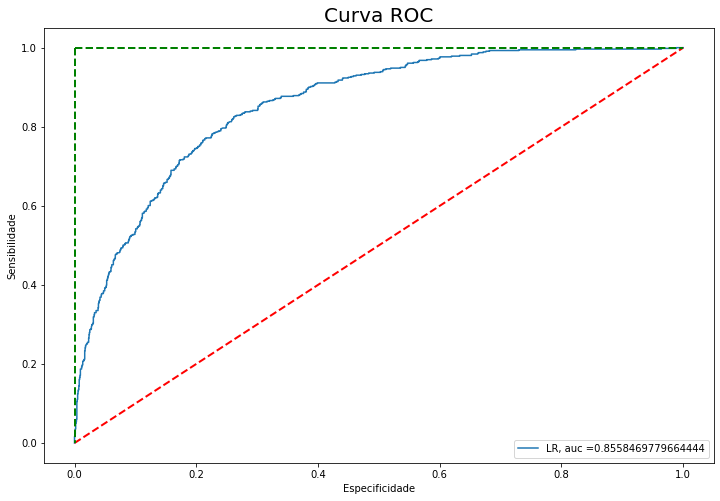

In [ ]:
# Plotando a curva ROC do RandomForest.
curva_roc(modelo_rf, X_test,y_test)

A acurácia deste modelo é : 80.08%.
A precisão é de: 66.13%
A taxa de recall é de:51.16%
O taxa de balancemento do modelo é: 57.69%


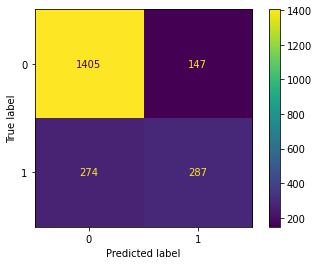

In [ ]:
#Rodando o AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

modelo_ab = roda_modelo(AdaBoostClassifier(n_estimators = 100, random_state = SEED))
previsoes = roda_previsoes(modelo_ab)
metricas(y_test, previsoes)

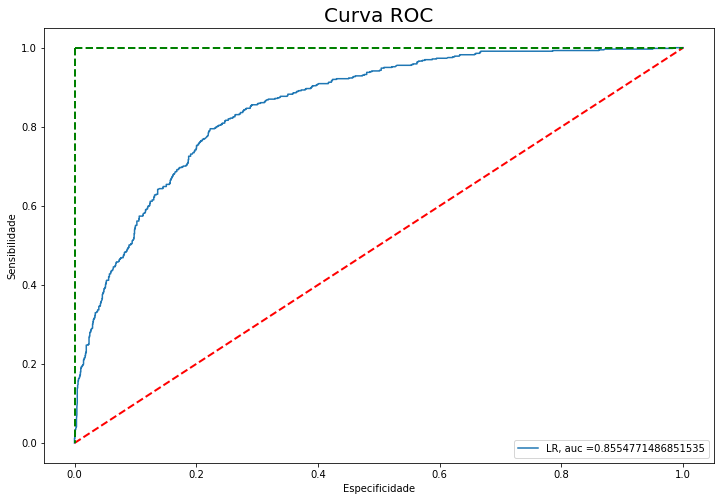

In [ ]:
curva_roc(modelo_ab, X_test, y_test)

**Ambos os modelos foram treinados e testados sem a realização de alterações na quantidade dos dados.** Como visto, os dois trouxeram resultados relativamente próximos, com valores de Recall inferiores a linha de base e insatisfatório. Então, farei uma otimização na tentativa de obter resultados melhores.

### Tentativa de otimização dos modelos.


In [ ]:
# Definindo os hiperparâmetros que serão utilizados no RandomizedSearchCV.
n_estimators = np.arange(20,200, step = 20)
criterion = ['gini','entropy']
max_features = ['auto', 'sqrt','log2']
max_depth = list(np.arange(2,10,step = 1))
min_samples_split = np.arange(2,10,step = 2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Criando um dicionário com os valores definidos anteriormente.
parametros = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'bootstrap': bootstrap}

In [ ]:
# Definindo a SEED para garantir a replicabilidade.
SEED = 7
np.random.seed(SEED)

# Definindo o cv (Cross-Validation).
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state= SEED)

# Definindo o qual será o estimador.
modelo_rf = RandomForestClassifier(random_state = SEED)

# Definindo um novo modelo_rf e criando o Randomcv_rf.
randomcv_rf = RandomizedSearchCV(modelo_rf, parametros, scoring = 'recall', n_jobs = -1, cv = cv, return_train_score = False)


In [ ]:
%%time
# Definindo uma nova variável que contém o randomcv_rf treinado.
random_cv_rf = randomcv_rf.fit(X, y)

CPU times: user 2.01 s, sys: 101 ms, total: 2.11 s
Wall time: 51.3 s


In [ ]:
# Criando um DataFrame com 'cv_results_' obtido com o resultado da pesquisa randômica 
pd.DataFrame(random_cv_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.266274,0.497027,0.063403,0.022247,160,4,1,auto,7,entropy,False,"{'n_estimators': 160, 'min_samples_split': 4, ...",0.524064,0.524064,0.502674,0.483871,0.497326,0.545455,0.486631,0.534759,0.550802,0.518717,0.516836,0.022321,2
1,0.756445,0.008258,0.043280,0.005026,140,8,4,sqrt,3,gini,True,"{'n_estimators': 140, 'min_samples_split': 8, ...",0.374332,0.326203,0.352941,0.311828,0.336898,0.347594,0.368984,0.310160,0.331551,0.342246,0.340274,0.020503,9
2,0.347412,0.007853,0.018999,0.001399,60,4,4,sqrt,3,gini,False,"{'n_estimators': 60, 'min_samples_split': 4, '...",0.406417,0.331551,0.374332,0.338710,0.336898,0.358289,0.385027,0.320856,0.358289,0.368984,0.357935,0.025217,8
3,1.137899,0.015247,0.039171,0.001119,120,6,4,auto,7,entropy,True,"{'n_estimators': 120, 'min_samples_split': 6, ...",0.513369,0.502674,0.475936,0.478495,0.486631,0.540107,0.475936,0.550802,0.534759,0.508021,0.506673,0.026461,4
4,0.228108,0.007588,0.013813,0.000347,40,6,2,log2,4,gini,True,"{'n_estimators': 40, 'min_samples_split': 6, '...",0.411765,0.336898,0.342246,0.354839,0.342246,0.342246,0.395722,0.310160,0.390374,0.422460,0.364896,0.035397,7
5,0.726852,0.010305,0.033564,0.003203,100,2,4,auto,6,gini,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.491979,0.481283,0.443850,0.435484,0.475936,0.513369,0.443850,0.497326,0.534759,0.508021,0.482586,0.031444,6
6,1.570421,0.014389,0.050554,0.002190,140,2,1,sqrt,9,gini,False,"{'n_estimators': 140, 'min_samples_split': 2, ...",0.534759,0.508021,0.524064,0.489247,0.486631,0.502674,0.497326,0.545455,0.566845,0.513369,0.516839,0.024572,1
7,0.167382,0.007336,0.010222,0.002072,20,8,4,log2,9,gini,True,"{'n_estimators': 20, 'min_samples_split': 8, '...",0.518717,0.513369,0.534759,0.467742,0.491979,0.524064,0.508021,0.497326,0.572193,0.534759,0.516293,0.026941,3
8,0.855228,0.016955,0.034028,0.001907,100,4,1,log2,7,entropy,True,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.502674,0.491979,0.481283,0.451613,0.475936,0.540107,0.481283,0.497326,0.524064,0.513369,0.495963,0.024296,5
9,1.000673,0.016296,0.049832,0.006369,180,8,4,log2,3,entropy,True,"{'n_estimators': 180, 'min_samples_split': 8, ...",0.326203,0.310160,0.251337,0.290323,0.288770,0.256684,0.342246,0.240642,0.278075,0.304813,0.288925,0.031368,10


In [ ]:
# Visualizando os melhores parâmetros encontrados, dentre aqueles definidos anteriormente.
random_cv_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}

A acurácia deste modelo é : 80.36%.
A precisão é de: 66.90%
A taxa de recall é de:51.52%
O taxa de balancemento do modelo é: 58.21%


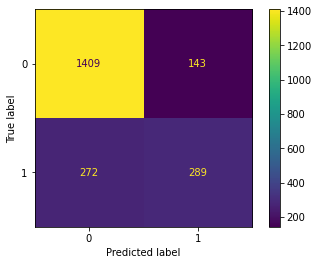

In [ ]:
# Rodando o RandomForestClassifier para os melhores parâmetros encontrados, obtendo a previsão deste modelo e suas métricas.
n_modelo_rf = roda_modelo(RandomForestClassifier(**random_cv_rf.best_params_, random_state = SEED))
previsoes = roda_previsoes(n_modelo_rf)
metricas(y_test, previsoes)

In [ ]:
# Definindo o parâmetro que será utilizado na procura para melhora do AdaBoostClassifier.
n_estimators = np.arange(20,200, step = 20)

# Definindo o dicionário.
param = {'n_estimators': n_estimators}

# Definindo a SEED para garantir a replicabilidade.
SEED = 7
np.random.seed(SEED)

# Definindo o cv (Cross-Validation).
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state= SEED)

In [ ]:
# Definindo qual será o estimador a ser otimizado.
modelo_ab = AdaBoostClassifier(random_state = SEED)

# Criando a variável randomcv_ab para armazenar a pesquisa randômizada feita no estimador.
randomcv_ab = RandomizedSearchCV(modelo_ab, param, scoring = 'recall', n_jobs = -1, cv = cv, return_train_score = False)


In [ ]:
%%time
# Definindo uma nova variável que contém o randomcv_ab treinado.
rcv_ab = randomcv_ab.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


CPU times: user 1.1 s, sys: 55.4 ms, total: 1.15 s
Wall time: 59 s


In [ ]:
# Criando um DataFrame com 'cv_results_' obtido com o resultado da pesquisa randômica.
pd.DataFrame(rcv_ab.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.258434,0.014224,0.011794,0.000230,20,{'n_estimators': 20},0.529412,0.524064,0.524064,0.500000,0.540107,0.524064,0.556150,0.566845,0.545455,0.566845,0.537701,0.020379,3
1,0.494580,0.012194,0.022652,0.002842,40,{'n_estimators': 40},0.513369,0.524064,0.502674,0.505376,0.572193,0.572193,0.529412,0.582888,0.534759,0.566845,0.540377,0.028855,1
2,0.732600,0.010368,0.030878,0.000753,60,{'n_estimators': 60},0.513369,0.513369,0.508021,0.505376,0.545455,0.545455,0.556150,0.556150,0.540107,0.588235,0.537169,0.025431,4
3,0.970567,0.009418,0.040057,0.000463,80,{'n_estimators': 80},0.524064,0.524064,0.502674,0.510753,0.545455,0.529412,0.561497,0.556150,0.556150,0.588235,0.539845,0.024917,2
4,1.248367,0.022959,0.052105,0.004359,100,{'n_estimators': 100},0.502674,0.508021,0.518717,0.500000,0.545455,0.534759,0.545455,0.566845,0.556150,0.582888,0.536096,0.026878,7
5,1.468924,0.014494,0.067238,0.008566,120,{'n_estimators': 120},0.508021,0.518717,0.508021,0.516129,0.540107,0.534759,0.545455,0.550802,0.545455,0.572193,0.533966,0.019859,9
6,1.697250,0.015487,0.070801,0.004222,140,{'n_estimators': 140},0.497326,0.518717,0.524064,0.500000,0.561497,0.540107,0.545455,0.561497,0.550802,0.572193,0.537166,0.024809,6
7,2.113181,0.327499,0.079555,0.003916,160,{'n_estimators': 160},0.508021,0.518717,0.529412,0.505376,0.545455,0.545455,0.540107,0.556150,0.550802,0.572193,0.537169,0.020444,4
8,2.198001,0.029399,0.086988,0.013450,180,{'n_estimators': 180},0.513369,0.513369,0.524064,0.505376,0.556150,0.540107,0.545455,0.550802,0.540107,0.561497,0.535030,0.018691,8


A acurácia deste modelo é : 80.22%.
A precisão é de: 66.29%
A taxa de recall é de:51.87%
O taxa de balancemento do modelo é: 58.20%


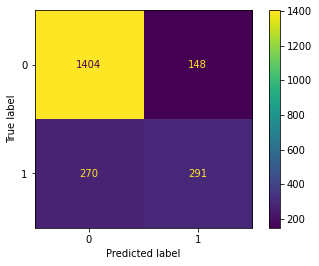

In [ ]:
# Rodando o AdaBoostClassifier para os melhores parâmetros encontrados, obtendo a previsão deste modelo e suas métricas.
n_modelo_ab = roda_modelo(AdaBoostClassifier(**rcv_ab.best_params_, random_state = SEED))
previsoes = roda_previsoes(n_modelo_ab)
metricas(y_test, previsoes)

  Considerações sobre os resultados obtidos:

 - Apesar do modelo RandomForest apresentar uma pequena melhora na taxa de 
Recall, o resultado obtido em ambos os modelos ainda não é satisfatório e se encontram abaixo ou bem próximo da linha de base. 





## Segunda Abordagem.

Nessa segunda abordagem será empregado o método de **OverSampling**, como forma de contornar ou resolver o problema de **desbalanceamento** dos dados. Neste método, como o nome já indica, será adicionado **novos dados** a classe minoritária para que exista um **equilíbrio** entre as classes.

Aqui será utilizado o **SMOTE** da biblioteca **imblearn** como a ferramenta utilizada para realizar esse ajuste nos dados.

In [ ]:
# Realizando novamente a divisão dos dados entre (X, y).
X = df.drop(columns = 'Evasao', axis = 1)
y =df['Evasao'] 

In [ ]:
# Instaciando o SMOTE
smt = SMOTE()

# Balanceando as variáveis com a ajuda do SMOTE
X,y = smt.fit_resample(X,y)

In [ ]:
# Verificando se o balanceamento deu certo
np.bincount(y)

array([5174, 5174])

In [ ]:
# Dividindo os dados já balanceados entre as bases de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED, stratify= y)

A acurácia deste modelo é : 82.29%.
A precisão é de: 79.24%
A taxa de recall é de:87.51%
O taxa de balancemento do modelo é: 83.17%


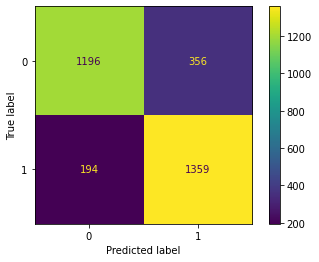

In [ ]:
# Rodando o RandomForest com o método de OverSampling, prevendo os valores e obtendo as métricas.
modelo_over_rf = roda_modelo(RandomForestClassifier(max_depth = 5, random_state = SEED))
previsoes = roda_previsoes(modelo_over_rf)
metricas(y_test, previsoes)

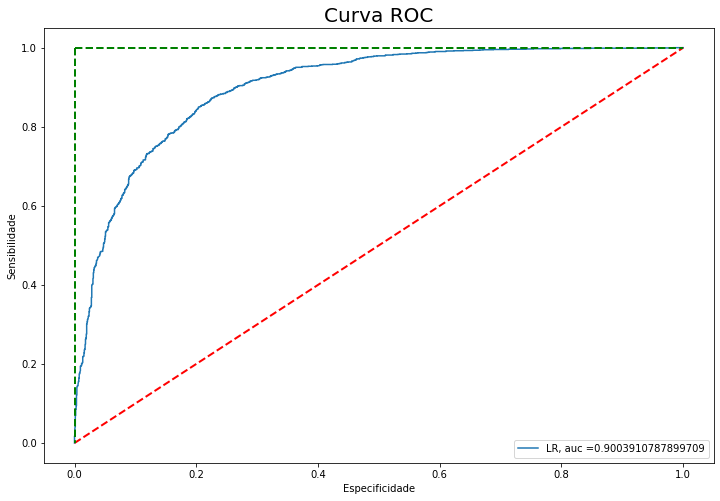

In [ ]:
# Plotando a nova curva ROC para o RandomForest.
curva_roc(modelo_over_rf, X_test, y_test)

A acurácia deste modelo é : 85.22%.
A precisão é de: 84.75%
A taxa de recall é de:85.90%
O taxa de balancemento do modelo é: 85.32%


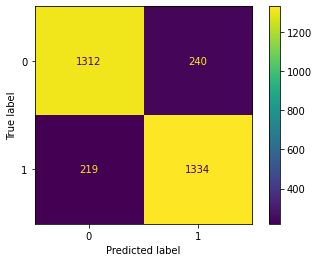

In [ ]:
# Rodando o AdaBoost com o método de OverSampling, prevendo os valores e obtendo as métricas.
modelo_over_ab = roda_modelo(AdaBoostClassifier(random_state = SEED, n_estimators= 100))
previsoes = roda_previsoes(modelo_over_ab)
metricas(y_test, previsoes)

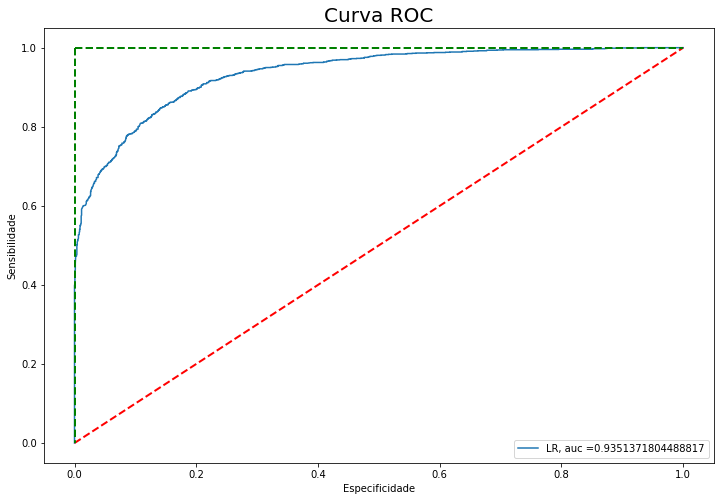

In [ ]:
# Plotando a nova curva ROC para o AdaBoost.
curva_roc(modelo_over_ab, X_test, y_test)

Depois da aplicação do **SMOTE** nos dois modelos é possível observar uma melhora das métricas, em especial o **Recall** que apresentou uma melhora em torno de 40%.

Até este momento, o melhor resultado obtido foi pelo modelo de RandomForestClassifier, apresentando uma taxa de Recall de **87,51%.**

### Otimização dos modelos

Serão utilizados os mesmos parâmetros que foram definidos anteriormente e foram instanciados na variável (paramentros), como forma de garantir que serão as mesmas em todas as abordagens.

####Otimazação do RandomForest

In [ ]:
# Definindo qual será o estimador utilizado.
n_modelo_over_rf = RandomForestClassifier(random_state= SEED)

# Criando uma  nova variável n_randomcv_rf para armazenar a pesquisa randômizada feita no estimador.
n_randomcv_rf = RandomizedSearchCV(n_modelo_over_rf, parametros, scoring= 'recall',cv = cv, n_jobs = -1, random_state= SEED, return_train_score= False)


In [ ]:
# Definindo uma nova variável que contém o n_randomcv_ab treinado.
nrandomcv_rf = n_randomcv_rf.fit(X, y)

In [ ]:
# Criando um DataFrame com o 'cv_results_' obtidos com a pesquisa randômica.
pd.DataFrame(nrandomcv_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.774987,0.028581,0.063562,0.006391,160,4,1,auto,7,entropy,False,"{'n_estimators': 160, 'min_samples_split': 4, ...",0.868472,0.899420,0.872340,0.872340,0.884170,0.876448,0.870656,0.855212,0.878143,0.858801,0.873600,0.011842,2
1,0.987933,0.009552,0.050081,0.005154,140,8,4,sqrt,3,gini,True,"{'n_estimators': 140, 'min_samples_split': 8, ...",0.829787,0.864603,0.860735,0.843327,0.847490,0.830116,0.812741,0.830116,0.835590,0.833656,0.838816,0.014802,10
2,0.467773,0.005185,0.023624,0.000464,60,4,4,sqrt,3,gini,False,"{'n_estimators': 60, 'min_samples_split': 4, '...",0.831721,0.862669,0.851064,0.841393,0.855212,0.841699,0.808880,0.830116,0.831721,0.843327,0.839780,0.014444,9
3,1.639240,0.020580,0.048367,0.003050,120,6,4,auto,7,entropy,True,"{'n_estimators': 120, 'min_samples_split': 6, ...",0.866538,0.897485,0.878143,0.878143,0.891892,0.866795,0.868726,0.857143,0.866538,0.856867,0.872827,0.012888,3
4,0.298258,0.007792,0.017374,0.000417,40,6,2,log2,4,gini,True,"{'n_estimators': 40, 'min_samples_split': 6, '...",0.829787,0.864603,0.866538,0.845261,0.859073,0.822394,0.810811,0.835907,0.845261,0.831721,0.841136,0.017514,8
5,0.997533,0.008606,0.040525,0.001717,100,2,4,auto,6,gini,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.860735,0.887814,0.874275,0.868472,0.884170,0.870656,0.861004,0.861004,0.866538,0.864603,0.869927,0.009099,6
6,2.213519,0.015459,0.063787,0.004103,140,2,1,sqrt,9,gini,False,"{'n_estimators': 140, 'min_samples_split': 2, ...",0.868472,0.889749,0.870406,0.866538,0.886100,0.870656,0.874517,0.857143,0.870406,0.858801,0.871279,0.009793,5
7,0.232455,0.006707,0.013401,0.000608,20,8,4,log2,9,gini,True,"{'n_estimators': 20, 'min_samples_split': 8, '...",0.858801,0.897485,0.878143,0.860735,0.888031,0.870656,0.864865,0.855212,0.878143,0.864603,0.871668,0.012928,4
8,1.191145,0.017554,0.044961,0.006848,100,4,1,log2,7,entropy,True,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.870406,0.899420,0.878143,0.862669,0.897683,0.878378,0.866795,0.855212,0.866538,0.862669,0.873791,0.014047,1
9,1.311386,0.009180,0.058370,0.008898,180,8,4,log2,3,entropy,True,"{'n_estimators': 180, 'min_samples_split': 8, ...",0.837524,0.870406,0.862669,0.847195,0.849421,0.839768,0.812741,0.835907,0.837524,0.831721,0.842488,0.015355,7


In [ ]:
# Observando os melhores parâmetros encontrados.
nrandomcv_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

A acurácia deste modelo é : 83.80%.
A precisão é de: 80.99%
A taxa de recall é de:88.35%
O taxa de balancemento do modelo é: 84.51%


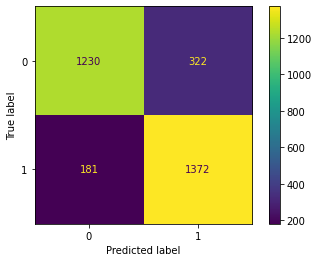

In [ ]:
# Rodando o RandomForestClassifier para os melhores parâmetros encontrados, obtendo a previsão deste modelo e suas métricas. (OverSampling)
n_modelo_over_rf = roda_modelo(RandomForestClassifier(**nrandomcv_rf.best_params_, random_state = SEED))
previsoes = roda_previsoes(n_modelo_over_rf)
metricas(y_test, previsoes)

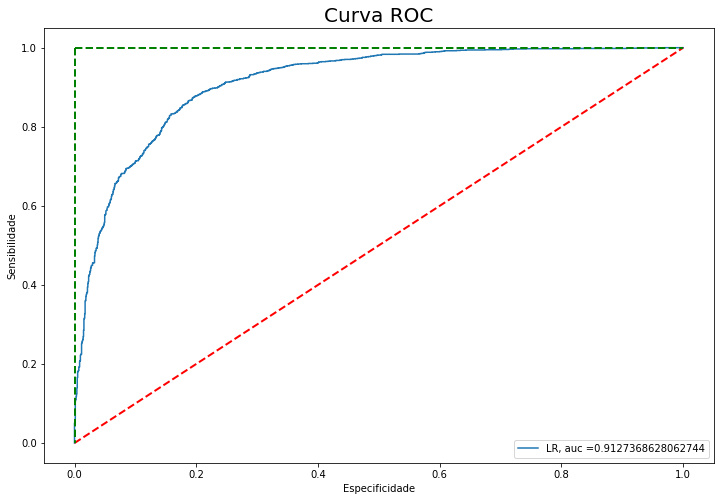

In [ ]:
# Plotando a nova curva ROC para o RandomForest. (OverSampling)
curva_roc(n_modelo_over_rf, X_test,y_test)

####Otimização do AdaBoost

In [ ]:
# Definindo qual será o estimador a ser otimizado.
n_modelo_ab = AdaBoostClassifier(random_state = SEED)

# Criando a variável n_randomcv_ab para armazenar a pesquisa randômizada feita no estimador.
n_randomcv_ab = RandomizedSearchCV(n_modelo_ab, param, scoring = 'recall', n_jobs = -1, cv = cv, return_train_score = False)

In [ ]:
%%time
# Definindo uma nova variável que contém o n_randomcv_ab treinado.
nrcv_ab = n_randomcv_ab.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


CPU times: user 2.05 s, sys: 101 ms, total: 2.15 s
Wall time: 1min 20s


In [ ]:
# Criando um DataFrame com 'cv_results_' obtido com o resultado da pesquisa randômica.
pd.DataFrame(nrcv_ab.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.358413,0.014993,0.017361,0.002163,20,{'n_estimators': 20},0.852998,0.882012,0.868472,0.882012,0.884170,0.841699,0.855212,0.851351,0.831721,0.854932,0.860458,0.017117,9
1,0.675549,0.008746,0.029990,0.003771,40,{'n_estimators': 40},0.883946,0.889749,0.851064,0.864603,0.899614,0.839768,0.830116,0.849421,0.854932,0.860735,0.862395,0.021241,5
2,1.012161,0.009016,0.038957,0.001395,60,{'n_estimators': 60},0.882012,0.893617,0.872340,0.868472,0.876448,0.862934,0.859073,0.853282,0.866538,0.856867,0.869158,0.011737,2
3,1.328816,0.010023,0.050723,0.005136,80,{'n_estimators': 80},0.882012,0.903288,0.876209,0.866538,0.884170,0.864865,0.861004,0.847490,0.870406,0.860735,0.871672,0.014750,1
4,1.840432,0.324572,0.061277,0.002738,100,{'n_estimators': 100},0.880077,0.891683,0.864603,0.868472,0.886100,0.857143,0.853282,0.843629,0.854932,0.849130,0.864905,0.015510,3
5,2.001325,0.016761,0.076127,0.001956,120,{'n_estimators': 120},0.882012,0.880077,0.870406,0.854932,0.882239,0.855212,0.853282,0.845560,0.852998,0.843327,0.862005,0.014421,7
6,2.341785,0.019214,0.088264,0.002669,140,{'n_estimators': 140},0.878143,0.883946,0.868472,0.860735,0.876448,0.861004,0.853282,0.843629,0.852998,0.843327,0.862198,0.013558,6
7,2.656677,0.013792,0.102825,0.005859,160,{'n_estimators': 160},0.880077,0.883946,0.872340,0.856867,0.880309,0.862934,0.847490,0.839768,0.849130,0.841393,0.861425,0.016030,8
8,2.968179,0.015947,0.109079,0.007219,180,{'n_estimators': 180},0.880077,0.885880,0.866538,0.858801,0.882239,0.855212,0.853282,0.845560,0.860735,0.843327,0.863165,0.014376,4


In [ ]:
# Observando os melhores parâmetros encontrados.
nrcv_ab.best_params_

{'n_estimators': 80}

A acurácia deste modelo é : 85.28%.
A precisão é de: 84.99%
A taxa de recall é de:85.71%
O taxa de balancemento do modelo é: 85.35%


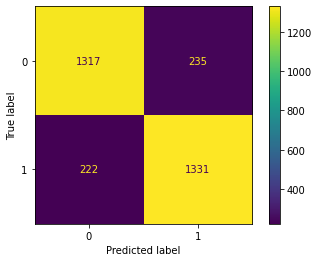

In [ ]:
# Rodando o AdaBoostClassifier para os melhores parâmetros encontrados, obtendo a previsão deste modelo e suas métricas.
n_modelo_over_ab = roda_modelo(AdaBoostClassifier(**nrcv_ab.best_params_, random_state = SEED))
previsoes = roda_previsoes(n_modelo_over_ab)
metricas(y_test, previsoes)

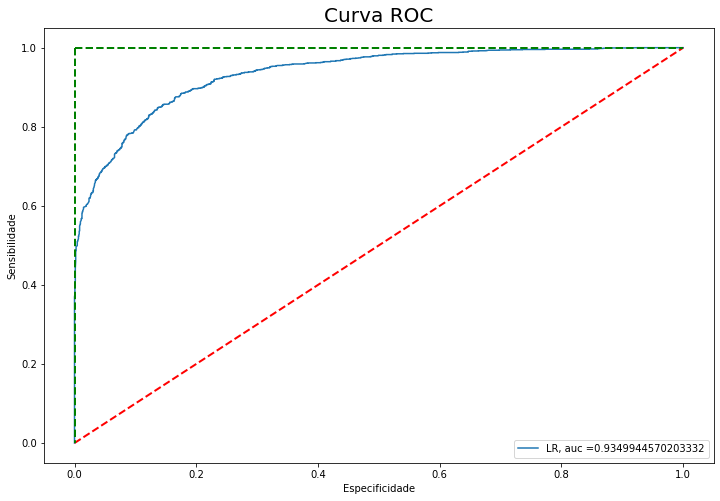

In [ ]:
#Plotando a curva ROC do AdaBoostClassifier.
curva_roc(n_modelo_over_ab, X_test, y_test)

Considerações sobre os resultados obtidos:
  
 - É possível observar uma relevante melhora na taxa de **Recall**, auferida como resultado após a implementação do procedimento de balanceamento dos bados por meio do **OverSampling**.  
 - Nos dois eventos, com os sem otimização, as taxas encontradas são satisfatórias e até o momento as maiores encontradas. Sendo o modelo de **RandomForestClassifier** o que apresentou o melhor resultado.
 - Um outro ponto que merece certo destaque é que a **curva ROC**, do modelo AdaBoost, apresentou bons valores relativos a área sob a curva.

## Terceira Abordagem

Nessa terceira abordagem será empregado o método de **UnderSampling**, como forma de contornar ou resolver o problema de **desbalanceamento** dos dados. Já nesse método, ao contrário do anterior, serão removido dados a classe maioritária para que exista um **equilíbrio** entre as classes.

Aqui será utilizado o **NearMiss** também da biblioteca **imblearn** como a ferramenta utilizada para realizar esse ajuste nos dados.

In [ ]:
# Realizando novamente a divisão dos dados entre (X, y).
X = df.drop(columns = 'Evasao', axis = 1)
y = df['Evasao']

# Instanciando o NearMiss e balanceando as variáveis com a ajuda dele.
nm = NearMiss()
X, y = nm.fit_resample(X, y)

# Verificando se o balanceamento deu certo
np.bincount(y)

array([1869, 1869])

A acurácia deste modelo é : 68.54%.
A precisão é de: 64.57%
A taxa de recall é de:82.17%
O taxa de balancemento do modelo é: 72.31%


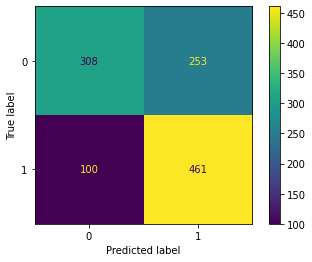

In [ ]:
# Dividindo os dados já balanceados entre as bases de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y,  random_state = SEED)

# Rodando o RandomForest com o método de UnderSampling, prevendo os valores e obtendo as métricas.
modelo_under_rf = roda_modelo(RandomForestClassifier(max_depth = 5, random_state = SEED))
previsoes = roda_previsoes(modelo_under_rf)
metricas(y_test, previsoes)

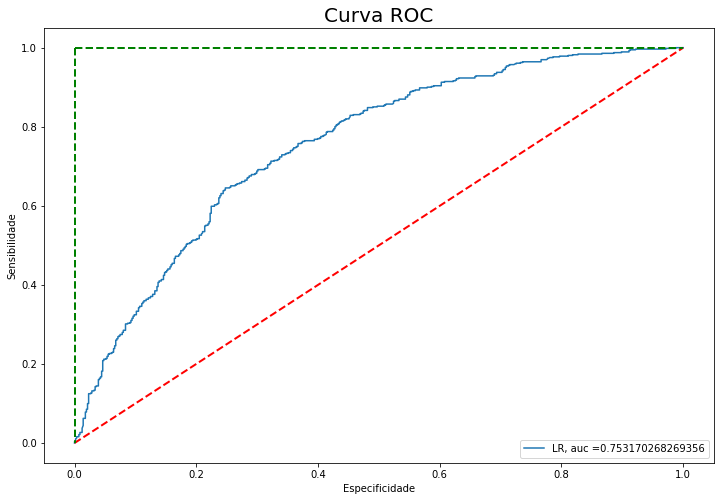

In [ ]:
#Plotando a curva ROC para esse modelo estimado acima
curva_roc(modelo_under_rf, X_test, y_test)

A acurácia deste modelo é : 69.43%.
A precisão é de: 67.19%
A taxa de recall é de:75.94%
O taxa de balancemento do modelo é: 71.30%


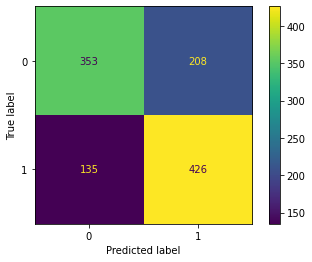

In [ ]:
# Rodando o AdaBoostClassifier com o método de UnderSampling, prevendo os valores e obtendo as métricas.
modelo_under_ab = roda_modelo(AdaBoostClassifier(n_estimators = 100, random_state = SEED))
previsoes = roda_previsoes(modelo_under_ab)
metricas(y_test, previsoes)

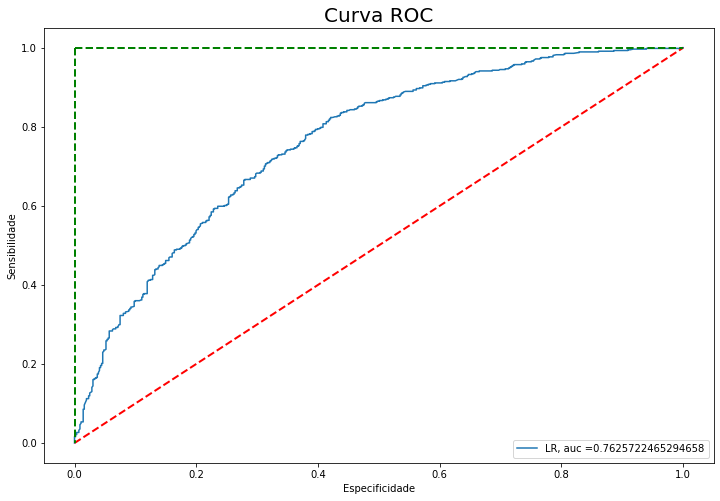

In [ ]:
#Plotando a curva ROC para esse modelo estimado acima
curva_roc(modelo_under_ab, X_test, y_test)

Com a utilização do **NearMiss** os resultados encontrados são superiores a primeira abordagem, onde os modelos foram treinados mantendo-se o desbalaceamento dos dados. Contudo, foram inferiores aos encontrados com a aplicação do **SMOTE**, onde os dados foram balanceados por meio do aumento da classe minoritária.


### Otimização dos modelos.

Aqui tambem serão utilizados os mesmos parâmetros que foram definidos inicialmente e estão instanciados nas variáveis (paramentros e param), como forma de garantir que serão as mesmas em todas as abordagens.

#### Melhorando o RandomForest com UnderSampling


In [ ]:
# Definindo qual será o estimador utilizado.
n_modelo_under_rf = RandomForestClassifier(random_state= SEED)

# Criando uma  nova variável n_rdcv_rf para armazenar a pesquisa randômizada feita no estimador.
n_rdcv_rf = RandomizedSearchCV(n_modelo_under_rf, parametros, scoring= 'recall',cv = cv, n_jobs = -1, random_state= SEED, return_train_score= False)

# Definindo uma nova variável que contém o n_rdcv_ab treinado.
nrcv_rf = n_rdcv_rf.fit(X, y)


In [ ]:
# Criando o DataFrame com o 'cv_results_' obtidos na pesquisa randômica.
pd.DataFrame(nrcv_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.081925,0.016967,0.049061,0.004143,160,4,1,auto,7,entropy,False,"{'n_estimators': 160, 'min_samples_split': 4, ...",0.802139,0.748663,0.786096,0.754011,0.727273,0.786096,0.748663,0.775401,0.779570,0.775401,0.768331,0.021599,6
1,0.507210,0.008923,0.037999,0.004382,140,8,4,sqrt,3,gini,True,"{'n_estimators': 140, 'min_samples_split': 8, ...",0.844920,0.770053,0.828877,0.764706,0.759358,0.812834,0.770053,0.796791,0.801075,0.780749,0.792942,0.027552,3
2,0.213457,0.007177,0.018080,0.000756,60,4,4,sqrt,3,gini,False,"{'n_estimators': 60, 'min_samples_split': 4, '...",0.839572,0.759358,0.839572,0.764706,0.786096,0.796791,0.786096,0.812834,0.795699,0.796791,0.797752,0.025631,2
3,0.712190,0.011839,0.034572,0.001247,120,6,4,auto,7,entropy,True,"{'n_estimators': 120, 'min_samples_split': 6, ...",0.796791,0.732620,0.759358,0.759358,0.743316,0.791444,0.748663,0.754011,0.741935,0.780749,0.760825,0.020702,7
4,0.155569,0.007516,0.014957,0.001794,40,6,2,log2,4,gini,True,"{'n_estimators': 40, 'min_samples_split': 6, '...",0.802139,0.754011,0.812834,0.759358,0.759358,0.791444,0.770053,0.770053,0.784946,0.802139,0.780634,0.019837,4
5,0.461992,0.005829,0.028879,0.001964,100,2,4,auto,6,gini,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.796791,0.732620,0.796791,0.754011,0.759358,0.770053,0.764706,0.759358,0.768817,0.791444,0.769395,0.019495,5
6,0.897217,0.008604,0.043787,0.002163,140,2,1,sqrt,9,gini,False,"{'n_estimators': 140, 'min_samples_split': 2, ...",0.791444,0.695187,0.764706,0.716578,0.700535,0.748663,0.743316,0.748663,0.747312,0.802139,0.745854,0.033323,9
7,0.107706,0.003208,0.010387,0.000370,20,8,4,log2,9,gini,True,"{'n_estimators': 20, 'min_samples_split': 8, '...",0.786096,0.673797,0.775401,0.721925,0.711230,0.770053,0.721925,0.748663,0.720430,0.770053,0.739957,0.033921,10
8,0.773708,0.199395,0.042836,0.014406,100,4,1,log2,7,entropy,True,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.775401,0.727273,0.780749,0.754011,0.748663,0.754011,0.743316,0.764706,0.752688,0.796791,0.759761,0.019095,8
9,0.662033,0.016476,0.042968,0.005849,180,8,4,log2,3,entropy,True,"{'n_estimators': 180, 'min_samples_split': 8, ...",0.850267,0.786096,0.860963,0.786096,0.796791,0.807487,0.791444,0.807487,0.811828,0.818182,0.811664,0.024363,1


In [ ]:
# Visualizando os melhores parâmetros encontrados.
nrcv_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 180}

A acurácia deste modelo é : 65.95%.
A precisão é de: 61.82%
A taxa de recall é de:83.42%
O taxa de balancemento do modelo é: 71.02%


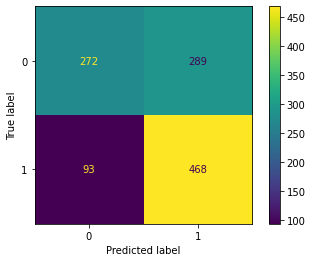

In [ ]:
# Rodando o RandomForestClassifier para os melhores parâmetros encontrados, obtendo a previsão deste modelo e suas métricas. (UnderSampling)
n_modelo_under_rf = roda_modelo(RandomForestClassifier(**nrcv_rf.best_params_, random_state = SEED))
previsoes = roda_previsoes(n_modelo_under_rf)
metricas(y_test, previsoes)

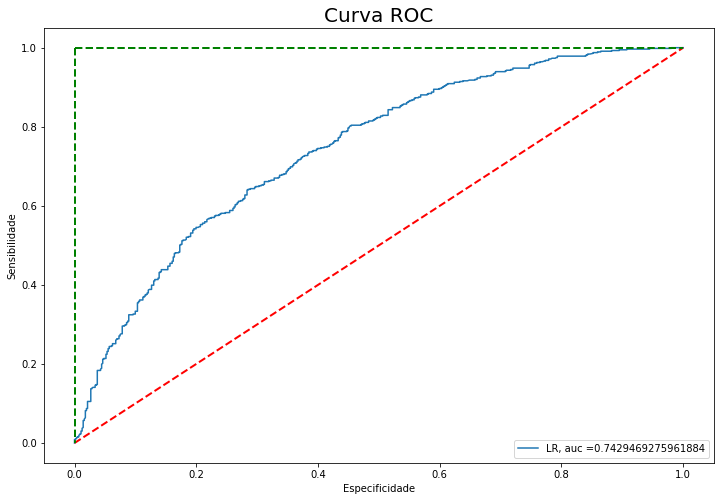

In [ ]:
# Plotando a curva ROC para esse modelo estimado acima
curva_roc(n_modelo_under_rf, X_test, y_test)

#### Melhorando o AdaBoost com UnderSampling

In [ ]:
# Definindo o estimador utilizado.
n_modelo_under_ab = AdaBoostClassifier(random_state = SEED)

# Criando a variável new_randomcv_ab para armazenar a pesquisa randômizada feita no estimador.
new_randomcv_ab = RandomizedSearchCV(n_modelo_under_ab, param, scoring = 'recall', n_jobs = -1, cv = cv, return_train_score = False)

In [ ]:
# Definindo uma nova variável que contém o new_randomcv_ab treinado.
new_rcv_ab = new_randomcv_ab.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
# Criando um DataFrame com 'cv_results_' obtido com o resultado da pesquisa randômica.
pd.DataFrame(new_rcv_ab.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.157046,0.007867,0.012398,0.000888,20,{'n_estimators': 20},0.727273,0.727273,0.775401,0.737968,0.721925,0.721925,0.679144,0.748663,0.725806,0.748663,0.731404,0.023560,2
1,0.300424,0.006013,0.020254,0.001854,40,{'n_estimators': 40},0.743316,0.727273,0.721925,0.721925,0.700535,0.732620,0.689840,0.732620,0.741935,0.759358,0.727135,0.019319,4
2,0.431457,0.010728,0.026783,0.000591,60,{'n_estimators': 60},0.721925,0.721925,0.732620,0.716578,0.695187,0.727273,0.721925,0.732620,0.715054,0.764706,0.724981,0.016688,5
3,0.576441,0.012676,0.035098,0.002216,80,{'n_estimators': 80},0.727273,0.743316,0.743316,0.732620,0.695187,0.732620,0.716578,0.737968,0.725806,0.775401,0.733008,0.019544,1
4,0.716724,0.006174,0.041629,0.000579,100,{'n_estimators': 100},0.727273,0.737968,0.732620,0.737968,0.684492,0.743316,0.721925,0.721925,0.715054,0.775401,0.729794,0.021918,3
5,1.008828,0.251661,0.060077,0.031060,120,{'n_estimators': 120},0.716578,0.737968,0.716578,0.716578,0.673797,0.754011,0.716578,0.716578,0.731183,0.759358,0.723920,0.022789,6
6,0.990464,0.007463,0.056166,0.001324,140,{'n_estimators': 140},0.716578,0.721925,0.716578,0.716578,0.679144,0.764706,0.705882,0.700535,0.720430,0.754011,0.719637,0.023325,7
7,1.140678,0.009761,0.067490,0.005843,160,{'n_estimators': 160},0.716578,0.721925,0.711230,0.711230,0.673797,0.764706,0.695187,0.684492,0.720430,0.737968,0.713754,0.024723,9
8,1.269060,0.043424,0.069426,0.010028,180,{'n_estimators': 180},0.711230,0.711230,0.732620,0.721925,0.668449,0.764706,0.695187,0.679144,0.736559,0.743316,0.716437,0.028193,8


In [ ]:
# Observando os melhores parâmetros encontrados.
new_rcv_ab.best_params_

{'n_estimators': 80}

A acurácia deste modelo é : 69.61%.
A precisão é de: 67.30%
A taxa de recall é de:76.29%
O taxa de balancemento do modelo é: 71.51%


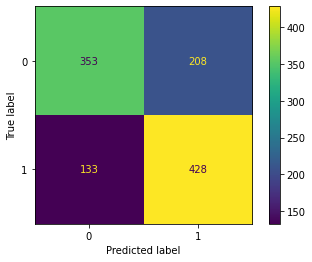

In [ ]:
# Rodando o AdaBoostClassifier para os melhores parâmetros encontrados, obtendo a previsão deste modelo e suas métricas.
new_modelo_under_ab = roda_modelo(AdaBoostClassifier(**new_rcv_ab.best_params_, random_state = SEED))
previsoes = roda_previsoes(new_modelo_under_ab)
metricas(y_test, previsoes)

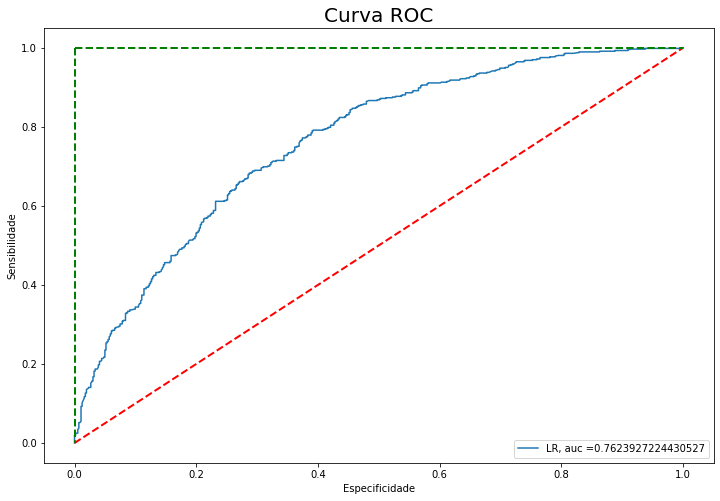

In [ ]:
# Plotando a curva ROC para esse modelo estimado acima
curva_roc(new_modelo_under_ab, X_test, y_test)

Considerações finais sobre a otimização dos modelos depois da aplicação do método de **undersampling**:
* Em ambos os modelos ocorreu uma pequena melhora nas métricas encontradas, no entato, nenhum dos resultados de **recall** encontrados superam os encontrados com o uso do método de **oversampling**.
* A **curva ROC** de ambos os modelos testados, antes ou depois da otimização, apresentaram valores relativamente baixos quando comparados com o método de balanceamento utilizado anteriormente.